In [1]:
# !pip install pywaffle
# !pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywaffle as pyw
import geopandas as gpd
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

#change the default option of displaying rows and columns to 999, so that I won't miss any columns with missing values.
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# read the data
data = pd.read_csv("data/DDS11_Data_Extract_with_labels.csv",dtype=str)
data

record - Record number Q1r1 - To begin, what is your age?  \
0                       4.0                               36.0   
1                       6.0                               26.0   
2                       9.0                               32.0   
3                      11.0                               25.0   
4                       3.0                               28.0   
...                     ...                                ...   
2126                 3584.0                               14.0   
2127                 3591.0                               70.0   
2128                 3620.0                               18.0   
2129                 3610.0                               79.0   
2130                 3673.0                               77.0   

     Q4 - What is your gender? age - you are...  \
0                         Male            34-50   
1                       Female            20-26   
2                       Female            27-33   
3                       Female            20-26   
4                         Male            27-33   
...                        ...              ...   
2126                      Male            14-19   
2127                      Male      70 or older   
2128                      Male            14-19   
2129                    Female      70 or older   
2130                    Female      70 or older   

     Q2 - In which state do you currently reside? region - Region  \
0                                         Georgia           South   
1                                        New York       Northeast   
2                                      New Jersey       Northeast   
3                                      California            West   
4                                         Indiana         Midwest   
...                                           ...             ...   
2126                                       Oregon            West   
2127                                Massachusetts       Northeast   
2128                                      Alabama           South   
2129                                     Illinois         Midwest   
2130                                 Pennsylvania       Northeast   

     QNEW3 - What is your employment status?  \
0            Employed full-time or part-time   
1            Employed full-time or part-time   
2            Employed full-time or part-time   
3            Employed full-time or part-time   
4                                    Student   
...                                      ...   
2126                              Unemployed   
2127                                 Retired   
2128                              Unemployed   
2129                                 Retired   
2130                                 Retired   

     Q5 - Which category best describes your ethnicity?  \
0                     White or Caucasian (Non-Hispanic)   
1                     White or Caucasian (Non-Hispanic)   
2                     White or Caucasian (Non-Hispanic)   
3                     White or Caucasian (Non-Hispanic)   
4                     White or Caucasian (Non-Hispanic)   
...                                                 ...   
2126                  White or Caucasian (Non-Hispanic)   
2127                  White or Caucasian (Non-Hispanic)   
2128                  White or Caucasian (Non-Hispanic)   
2129                  White or Caucasian (Non-Hispanic)   
2130                                        Multiracial   

     QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
0                                                   Yes                                           
1                                                   Yes                                           
2                                                   Yes                                           
3                                                   Yes                                 

# Problem Statement: Who is willing to pay more for higher speed Internet?
## In the question 29, each respondent is asked how much more they are willing to pay to double their download speed. Based on the whole dataset, we are going to study and predict who is willing to pay for higher Internet speed based on certain important features.

# Part1: Exploratory Data Analysis

### Based on the problem mentioned above, we decided to use owning home Internet access as a filter 

In [4]:
# Filter the data frame
internet_df = data[data['Q26 - Which of the following subscriptions does your household purchase?-Home internet'] == 'Yes']
internet_df

record - Record number Q1r1 - To begin, what is your age?  \
1                       6.0                               26.0   
3                      11.0                               25.0   
4                       3.0                               28.0   
9                      13.0                               16.0   
10                      5.0                               32.0   
...                     ...                                ...   
2126                 3584.0                               14.0   
2127                 3591.0                               70.0   
2128                 3620.0                               18.0   
2129                 3610.0                               79.0   
2130                 3673.0                               77.0   

     Q4 - What is your gender? age - you are...  \
1                       Female            20-26   
3                       Female            20-26   
4                         Male            27-33   
9                       Female            14-19   
10                      Female            27-33   
...                        ...              ...   
2126                      Male            14-19   
2127                      Male      70 or older   
2128                      Male            14-19   
2129                    Female      70 or older   
2130                    Female      70 or older   

     Q2 - In which state do you currently reside? region - Region  \
1                                        New York       Northeast   
3                                      California            West   
4                                         Indiana         Midwest   
9                                     Connecticut       Northeast   
10                                       New York       Northeast   
...                                           ...             ...   
2126                                       Oregon            West   
2127                                Massachusetts       Northeast   
2128                                      Alabama           South   
2129                                     Illinois         Midwest   
2130                                 Pennsylvania       Northeast   

     QNEW3 - What is your employment status?  \
1            Employed full-time or part-time   
3            Employed full-time or part-time   
4                                    Student   
9                                    Student   
10           Employed full-time or part-time   
...                                      ...   
2126                              Unemployed   
2127                                 Retired   
2128                              Unemployed   
2129                                 Retired   
2130                                 Retired   

     Q5 - Which category best describes your ethnicity?  \
1                     White or Caucasian (Non-Hispanic)   
3                     White or Caucasian (Non-Hispanic)   
4                     White or Caucasian (Non-Hispanic)   
9                     White or Caucasian (Non-Hispanic)   
10                    White or Caucasian (Non-Hispanic)   
...                                                 ...   
2126                  White or Caucasian (Non-Hispanic)   
2127                  White or Caucasian (Non-Hispanic)   
2128                  White or Caucasian (Non-Hispanic)   
2129                  White or Caucasian (Non-Hispanic)   
2130                                        Multiracial   

     QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   Yes                                           
3                                                   Yes                                           
4                                                   Yes                                           
9                                                   Yes                                 

## 1.2 Demographic questions data cleaning & analytics

### 1.2.1 Age

In [5]:
#slice out all demographic data
df_dmg = internet_df.iloc[:,1:17,]

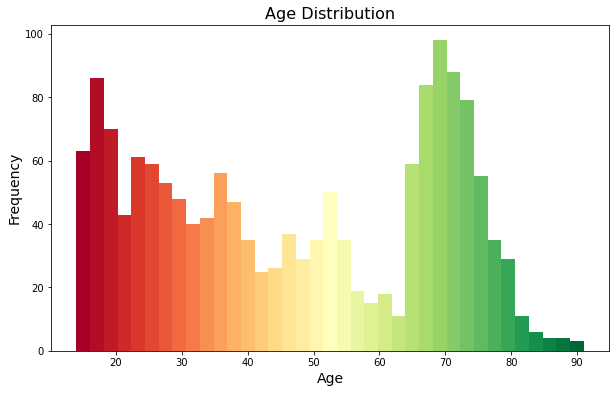

In [6]:
#draw histogram of age distribution
plt.figure(figsize=(10,6))

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlGn')

#plt.hist(df_dmg['Q1r1 - To begin, what is your age?'].astype(float), color='#006699', edgecolor='black', linewidth=1.2)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age Distribution', fontsize=16)

# Plot histogram.
n, bins, patches = plt.hist(df_dmg['Q1r1 - To begin, what is your age?'].astype(float), 37, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.show()

### Our targeted customers' age falls in 16-26 and 68-70 age group.

### 1.2.2 Gender

In [7]:
#count gender
counts = df_dmg['Q4 - What is your gender?'].value_counts()
gender_df = pd.DataFrame(counts)
gender_df['percent'] = (gender_df['Q4 - What is your gender?'] /gender_df['Q4 - What is your gender?'].sum()) * 100

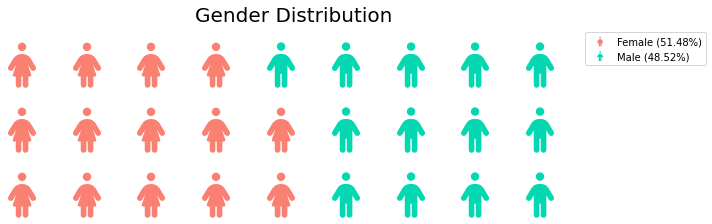

In [8]:
#draw histogram of age distribution
fig = plt.figure(
    FigureClass=pyw.Waffle, 
    rows=3, 
    columns = 9,
    values=gender_df['percent'], 
    colors=("#FA8072", "#04D8B2"),
    title={'label': 'Gender Distribution', 'loc': 'center','size':20},
    labels=[f"{k} ({'{:.2f}'.format(v)}%)" for k, v in zip(gender_df.index, gender_df.percent)],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons=['female','male'], 
    icon_size=45, 
    icon_legend=True,
    figsize=(10, 8)
)

#displaying the waffle chart
plt.show()

## Our targeted customers have a almost half-half gender distribution with females slightly more than males.

### 1.2.3 Region

In [9]:
#count region
counts = df_dmg['region - Region'].value_counts()
region_df = pd.DataFrame(counts)
region_df['percent'] = (region_df['region - Region'] /region_df['region - Region'].sum())

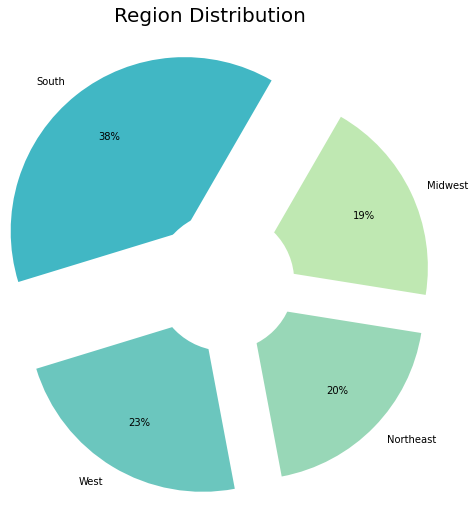

In [10]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Region Distribution', size = 20, color = 'black')
explode = (0.36931018, 0.24495542, 0.19943688, 0.18629751)
labels = ['South', 'West', 'Northeast', 'Midwest']
sizes = region_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# Adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

## Most of our target customers live in the South, while an even distribution of our target customers live in the West, Northwest, and Midwest.

### 1.2.4 Employment status

In [11]:
#count status
counts = df_dmg['QNEW3 - What is your employment status?'].value_counts()
status_df = pd.DataFrame(counts)
status_df['percent'] = (status_df['QNEW3 - What is your employment status?'] /status_df['QNEW3 - What is your employment status?'].sum())
status_df['percent']

Employed full-time or part-time    0.396662
Retired                            0.322208
Student                            0.116175
Unemployed                         0.099487
Self-employed                      0.065469
Name: percent, dtype: float64

In [12]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Employment Status Distribution', size = 20, color = 'black')
explode = (0.427499, 0.269357, 0.122478, 0.110277, 0.070389)
labels = ['Employed full-time or part-time', 'Retired', 'Student','Unemployed','Self-employed']
sizes = status_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2','#DDF2B2']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# Adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

## Our targeted customers are mainly employed or retired.

### 1.2.5 Annual Household Income

In [13]:
#count status
counts = df_dmg['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'].value_counts()
income_df = pd.DataFrame(counts)
income_df['percent'] = (income_df['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'] /income_df['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'].sum())
income_df['percent']

$50,000 to $99,999      0.366496
$30,000 to $49,999      0.208601
Less than $29,999       0.195764
$100,000 to $299,999    0.165597
Do not know             0.053273
More than $300,000      0.010270
Name: percent, dtype: float64

In [14]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Annual Income Distribution', size = 20, color = 'black')
explode = (0.345847, 0.212576, 0.199906, 0.174097, 0.056312,0.011262)
labels = ['$50,000 - $99,999', '< $29,999', '$30,000 - $49,999','$100,000 - $299,999','Do not know','>$300,000']
sizes = income_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2','#DDF2B2','#FFFFCB']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# Adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

## Most of our targeted customers have an annual household income below 100 k dollars

### 1.2.6 Ethnicity

In [15]:
#count ethnicity
counts = df_dmg['Q5 - Which category best describes your ethnicity?'].value_counts()
eth_df = pd.DataFrame(counts)
eth_df['percent'] = (eth_df['Q5 - Which category best describes your ethnicity?'] /eth_df['Q5 - Which category best describes your ethnicity?'].sum())
eth_df['percent']

White or Caucasian (Non-Hispanic)                                                   0.708601
African American                                                                    0.120668
Hispanic                                                                            0.098203
Multiracial                                                                         0.020539
East Asian or Southeast Asian                                                       0.019255
Caribbean                                                                           0.009628
Something else not listed here                                                      0.008986
South Asian (India, Pakistan, Sri Lanka)                                            0.006418
Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)    0.005135
Middle Eastern                                                                      0.002567
Name: percent, dtype: float64

In [16]:
# Sort the dataframe descendingly
eth_df.sort_values(by='percent', ascending=True, inplace=True)

# Create a color palette
palette = sns.color_palette("tab20c", len(eth_df['percent']))

# Create a horizontal bar plot
plt.barh(eth_df.index, eth_df['percent'], color=palette)

# Add labels and title
plt.title('Ethinicity Distribution')
plt.xlabel('Percentage')
plt.ylabel('Ethinicity')

# Show plot
plt.show()

## Our targeted customers mainly hold an ethinicity of White or Caucasion.

## 1.3 Check Missing values

In [17]:
df_na = internet_df.replace("#NULL!", None)
df_na.isna().sum()

record - Record number                                                                                                                                                                                                                                                 0
Q1r1 - To begin, what is your age?                                                                                                                                                                                                                                     0
Q4 - What is your gender?                                                                                                                                                                                                                                              0
age - you are...                                                                                                                                                                                             

In [18]:
df_na

record - Record number Q1r1 - To begin, what is your age?  \
1                       6.0                               26.0   
3                      11.0                               25.0   
4                       3.0                               28.0   
9                      13.0                               16.0   
10                      5.0                               32.0   
...                     ...                                ...   
2126                 3584.0                               14.0   
2127                 3591.0                               70.0   
2128                 3620.0                               18.0   
2129                 3610.0                               79.0   
2130                 3673.0                               77.0   

     Q4 - What is your gender? age - you are...  \
1                       Female            20-26   
3                       Female            20-26   
4                         Male            27-33   
9                       Female            14-19   
10                      Female            27-33   
...                        ...              ...   
2126                      Male            14-19   
2127                      Male      70 or older   
2128                      Male            14-19   
2129                    Female      70 or older   
2130                    Female      70 or older   

     Q2 - In which state do you currently reside? region - Region  \
1                                        New York       Northeast   
3                                      California            West   
4                                         Indiana         Midwest   
9                                     Connecticut       Northeast   
10                                       New York       Northeast   
...                                           ...             ...   
2126                                       Oregon            West   
2127                                Massachusetts       Northeast   
2128                                      Alabama           South   
2129                                     Illinois         Midwest   
2130                                 Pennsylvania       Northeast   

     QNEW3 - What is your employment status?  \
1            Employed full-time or part-time   
3            Employed full-time or part-time   
4                                    Student   
9                                    Student   
10           Employed full-time or part-time   
...                                      ...   
2126                              Unemployed   
2127                                 Retired   
2128                              Unemployed   
2129                                 Retired   
2130                                 Retired   

     Q5 - Which category best describes your ethnicity?  \
1                     White or Caucasian (Non-Hispanic)   
3                     White or Caucasian (Non-Hispanic)   
4                     White or Caucasian (Non-Hispanic)   
9                     White or Caucasian (Non-Hispanic)   
10                    White or Caucasian (Non-Hispanic)   
...                                                 ...   
2126                  White or Caucasian (Non-Hispanic)   
2127                  White or Caucasian (Non-Hispanic)   
2128                  White or Caucasian (Non-Hispanic)   
2129                  White or Caucasian (Non-Hispanic)   
2130                                        Multiracial   

     QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   Yes                                           
3                                                   Yes                                           
4                                                   Yes                                           
9                                                   Yes                                 

In [19]:
missing_count = df_na.isna().sum()
missing_df = (pd.concat([missing_count.rename('Missing count'),
                     missing_count.div(len(df_na))
                          .rename('Missing ratio')],axis = 1)
             .loc[missing_count.ne(0)])

#color the background of cells in a dataframe depending on the value of the data in each column 
missing_df.style.background_gradient(cmap="cool")

### 1.3.1 We drop the columns with missing values > 60%.

In [20]:
df_column_drop = df_na.copy()
df_column_drop = df_column_drop.drop(missing_df[missing_df['Missing ratio'] > 0.60].index, axis=1)

### 1.3.2 For the rest columns, we will clean the data based on the background information of each question group that current column belongs to

### The first column which is just a record number and does not contribute to the whole analysis,thus, we decided to drop it.

In [21]:
df_column_drop = df_column_drop.drop('record - Record number', axis=1)

In [22]:
missing_count1 = df_column_drop.isna().sum()
missing_df1 = (pd.concat([missing_count1.rename('Missing count'),
                     missing_count1.div(len(df_column_drop))
                          .rename('Missing ratio')],axis = 1)
             .loc[missing_count1.ne(0)])

#color the background of cells in a dataframe depending on the value of the data in each column 
missing_df1.style.background_gradient(cmap="cool")

In [23]:
df_column_drop

Q1r1 - To begin, what is your age? Q4 - What is your gender?  \
1                                  26.0                    Female   
3                                  25.0                    Female   
4                                  28.0                      Male   
9                                  16.0                    Female   
10                                 32.0                    Female   
...                                 ...                       ...   
2126                               14.0                      Male   
2127                               70.0                      Male   
2128                               18.0                      Male   
2129                               79.0                    Female   
2130                               77.0                    Female   

     age - you are... Q2 - In which state do you currently reside?  \
1               20-26                                     New York   
3               20-26                                   California   
4               27-33                                      Indiana   
9               14-19                                  Connecticut   
10              27-33                                     New York   
...               ...                                          ...   
2126            14-19                                       Oregon   
2127      70 or older                                Massachusetts   
2128            14-19                                      Alabama   
2129      70 or older                                     Illinois   
2130      70 or older                                 Pennsylvania   

     region - Region QNEW3 - What is your employment status?  \
1          Northeast         Employed full-time or part-time   
3               West         Employed full-time or part-time   
4            Midwest                                 Student   
9          Northeast                                 Student   
10         Northeast         Employed full-time or part-time   
...              ...                                     ...   
2126            West                              Unemployed   
2127       Northeast                                 Retired   
2128           South                              Unemployed   
2129         Midwest                                 Retired   
2130       Northeast                                 Retired   

     Q5 - Which category best describes your ethnicity?  \
1                     White or Caucasian (Non-Hispanic)   
3                     White or Caucasian (Non-Hispanic)   
4                     White or Caucasian (Non-Hispanic)   
9                     White or Caucasian (Non-Hispanic)   
10                    White or Caucasian (Non-Hispanic)   
...                                                 ...   
2126                  White or Caucasian (Non-Hispanic)   
2127                  White or Caucasian (Non-Hispanic)   
2128                  White or Caucasian (Non-Hispanic)   
2129                  White or Caucasian (Non-Hispanic)   
2130                                        Multiracial   

     QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   Yes                                           
3                                                   Yes                                           
4                                                   Yes                                           
9                                                   Yes                                           
10                                                  Yes                                           
...                                                 ...                                           
2126                                                Yes                                           
2127                                                 No          

### For question 11, now we only have options of "smartphone" and "laptop". We will replace None value with 4 since those are the people who do not think that "smartphone" and "laptop" are their first three choices.

In [24]:
df_column_drop.iloc[:,51:53]

Q11r10 - Laptop computer - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to rank.  The fir  \
1                                                     3                                                                                                                                                                                                                 
3                                                  None                                                                                                                                                                                                                 
4                                                     1                                                                                                                                                                                                                 
9                                                  None                                                                                                                                                                                                                 
10                                                 None                                                                                                                                                                                                                 
...                                                 ...                                                                                                                                                                                                                 
2126                                                  1                                                                                                                                                                                                                 
2127                                                  2                                                                                                                                                                                                                 
2128                                               None                                                                                                                                                                                                                 
2129                                               None                                                                                                                                                                                                                 
2130                                               None                                                                                                                                                                                                                 

     Q11r15 - Smartphone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in th  
1                                                     1                                                                                                                                                                         
3                                                  None                                                                                                                                                                         
4                                                     3                                                                                              

In [25]:
df_column_drop.iloc[:, 51:53] = df_column_drop.iloc[:,51:53].fillna(value=4)

### For question 22, we have 412 missing values, which indicates that 412 people do not have smart phone. Then we will replace the None value with string "No Smart Phone".

In [26]:
df_column_drop.iloc[:, 65:102]

Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Photo/video  \
1                                                   Yes                                                 
3                                                   Yes                                                 
4                                                    No                                                 
9                                                    No                                                 
10                                                   No                                                 
...                                                 ...                                                 
2126                                               None                                                 
2127                                                Yes                                                 
2128                                               None                                                 
2129                                               None                                                 
2130                                               None                                                 

     Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Banking  \
1                                                   Yes                                             
3                                                   Yes                                             
4                                                    No                                             
9                                                    No                                             
10                                                  Yes                                             
...                                                 ...                                             
2126                                               None                                             
2127                                                 No                                             
2128                                               None                                             
2129                                               None                                             
2130                                               None                                             

     Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Fitness/health  \
1                                                   Yes                                                    
3                                                   Yes                                                    
4                                                    No                                                    
9                                                    No                                                    
10                                                   No                                                    
...                                                 ...                                                    
2126                                               None                                                    
2127                                                 No                                                    
2128                                               None                                                    
2129                                               None                                                    
2130                                               None                                                    

     Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Food/drink  \
1                                                    No                                                
3                         

In [27]:
df_column_drop.iloc[:, 65:102] = df_column_drop.iloc[:, 65:102].fillna(value=-999)

### For question 36, now we only have options of "Pay TV" and "Home Internet". We will replace None value with 4 since those are the people who do not think that "Pay TV" and "Home Internet" are their first three choices.

In [28]:
df_column_drop.iloc[:, 114:116] = df_column_drop.iloc[:,114:116].fillna(value=4)

In [29]:
df_column_drop.iloc[:, 114:116]

Q36r1 - Pay TV (traditional cable and/or satellite bundle) - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking  \
1                                                     4                                                                                                                                                                                                                 
3                                                     2                                                                                                                                                                                                                 
4                                                     4                                                                                                                                                                                                                 
9                                                     3                                                                                                                                                                                                                 
10                                                    2                                                                                                                                                                                                                 
...                                                 ...                                                                                                                                                                                                                 
2126                                                  4                                                                                                                                                                                                                 
2127                                                  4                                                                                                                                                                                                                 
2128                                                  3                                                                                                                                                                                                                 
2129                                                  1                                                                                                                                                                                                                 
2130                                                  4                                                                                                                                                                                                                 

     Q36r2 - Home internet - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to r  
1                                                     1                                                                                                                                                                                                                
3                                                     1                                                                                                                                                                                                                
4                               

### For question 37, now we only have options of "Watching television (video content on any device)" and "Using the Internet for social or personal interests". We will replace None value with 4 since those are the people who do not think that "Watching television (video content on any device" and "Using the Internet for social or personal interests" are their first three choices.

In [30]:
df_column_drop.iloc[:, 117:119] = df_column_drop.iloc[:,117:119].fillna(value=4)
df_column_drop.iloc[:, 117:119]

Q37r3 - Watching television (video content on any device) - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selec  \
1                                                     4                                                                                                                                                                                                                 
3                                                     4                                                                                                                                                                                                                 
4                                                     2                                                                                                                                                                                                                 
9                                                     1                                                                                                                                                                                                                 
10                                                    4                                                                                                                                                                                                                 
...                                                 ...                                                                                                                                                                                                                 
2126                                                  4                                                                                                                                                                                                                 
2127                                                  4                                                                                                                                                                                                                 
2128                                                  3                                                                                                                                                                                                                 
2129                                                  2                                                                                                                                                                                                                 
2130                                                  4                                                                                                                                                                                                                 

     Q37r10 - Using the Internet for social or personal interests - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your se  
1                                                     1                                                                                                                                                                                                                
3                                                     4                                                                                                                                                                                                                
4                               

In [31]:
#df_column_drop.isna().sum()

In [32]:
df_column_drop

Q1r1 - To begin, what is your age? Q4 - What is your gender?  \
1                                  26.0                    Female   
3                                  25.0                    Female   
4                                  28.0                      Male   
9                                  16.0                    Female   
10                                 32.0                    Female   
...                                 ...                       ...   
2126                               14.0                      Male   
2127                               70.0                      Male   
2128                               18.0                      Male   
2129                               79.0                    Female   
2130                               77.0                    Female   

     age - you are... Q2 - In which state do you currently reside?  \
1               20-26                                     New York   
3               20-26                                   California   
4               27-33                                      Indiana   
9               14-19                                  Connecticut   
10              27-33                                     New York   
...               ...                                          ...   
2126            14-19                                       Oregon   
2127      70 or older                                Massachusetts   
2128            14-19                                      Alabama   
2129      70 or older                                     Illinois   
2130      70 or older                                 Pennsylvania   

     region - Region QNEW3 - What is your employment status?  \
1          Northeast         Employed full-time or part-time   
3               West         Employed full-time or part-time   
4            Midwest                                 Student   
9          Northeast                                 Student   
10         Northeast         Employed full-time or part-time   
...              ...                                     ...   
2126            West                              Unemployed   
2127       Northeast                                 Retired   
2128           South                              Unemployed   
2129         Midwest                                 Retired   
2130       Northeast                                 Retired   

     Q5 - Which category best describes your ethnicity?  \
1                     White or Caucasian (Non-Hispanic)   
3                     White or Caucasian (Non-Hispanic)   
4                     White or Caucasian (Non-Hispanic)   
9                     White or Caucasian (Non-Hispanic)   
10                    White or Caucasian (Non-Hispanic)   
...                                                 ...   
2126                  White or Caucasian (Non-Hispanic)   
2127                  White or Caucasian (Non-Hispanic)   
2128                  White or Caucasian (Non-Hispanic)   
2129                  White or Caucasian (Non-Hispanic)   
2130                                        Multiracial   

     QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   Yes                                           
3                                                   Yes                                           
4                                                   Yes                                           
9                                                   Yes                                           
10                                                  Yes                                           
...                                                 ...                                           
2126                                                Yes                                           
2127                                                 No          

In [33]:
df_final = df_column_drop

### Since most colums here are categorical only data, even though some categories are seldom chosen, it still represents a portion that shapes the distribution of the column data. We believe replacing or droping outliers in this case will cause data bias issue. Thus, no other specific outliers are handled here.

## 1.4 Summary statistics

### 1.4.1 For easier handling, we divide the columns into 2 groups: data frame with only numeric values; data frame with only categorical values

In [34]:
df_column_drop_num_age = pd.DataFrame(df_column_drop.iloc[:, 0])
df_column_drop_num_age

Q1r1 - To begin, what is your age?
1                                  26.0
3                                  25.0
4                                  28.0
9                                  16.0
10                                 32.0
...                                 ...
2126                               14.0
2127                               70.0
2128                               18.0
2129                               79.0
2130                               77.0

[1558 rows x 1 columns]

In [35]:
df_column_drop_num_time = df_column_drop.iloc[:, 53:65]
df_column_drop_num_time

Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
1                                                  40.0                                                                           
3                                                  10.0                                                                           
4                                                  10.0                                                                           
9                                                   5.0                                                                           
10                                                 30.0                                                                           
...                                                 ...                                                                           
2126                                                0.0                                                                           
2127                                                0.0                                                                           
2128                                                0.0                                                                           
2129                                                0.0                                                                           
2130                                                0.0                                                                           

     Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
1                                                  30.0                                                                       
3                                                  25.0                                                                       
4                                                   0.0                                                                       
9                                                  80.0                                                                       
10                                                  0.0                                                                       
...                                                 ...                                                                       
2126                                               25.0                                                                       
2127                                                0.0                                                                       
2128                                                0.0                                                                       
2129                                                0.0                                                                       
2130                                                0.0                                                                       

     Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
1                                                  30.0                                                                               
3                                                  15.0                                                                               
4                                                  10.0                                                                               
9                                                   0.0                                                                               
10                                                 70.0                                                                               
...                                                 ...                                          

In [36]:
# Concat two parts of the same data frame
df_column_drop_num = pd.concat([df_column_drop_num_age,df_column_drop_num_time], axis = 1)
df_column_drop_num # This is the dataframe for numerical columns
#df_column_drop_num.dtypes
df_column_drop_num[:] = df_column_drop_num[:].astype('float64') 
#df_column_drop_num.dtypes

In [37]:

#get the columns from df_column_drop that are not in df_column_drop_num
df_column_drop_cat_col = [col for col in df_column_drop.columns if col not in df_column_drop_num.columns]

#create a new data frame with only columns from the whole data frame that are not in numerical data frame
df_column_drop_cat = df_column_drop[df_column_drop_cat_col]
df_column_drop_cat # This is the dataframe for categorical columns

Q4 - What is your gender? age - you are...  \
1                       Female            20-26   
3                       Female            20-26   
4                         Male            27-33   
9                       Female            14-19   
10                      Female            27-33   
...                        ...              ...   
2126                      Male            14-19   
2127                      Male      70 or older   
2128                      Male            14-19   
2129                    Female      70 or older   
2130                    Female      70 or older   

     Q2 - In which state do you currently reside? region - Region  \
1                                        New York       Northeast   
3                                      California            West   
4                                         Indiana         Midwest   
9                                     Connecticut       Northeast   
10                                       New York       Northeast   
...                                           ...             ...   
2126                                       Oregon            West   
2127                                Massachusetts       Northeast   
2128                                      Alabama           South   
2129                                     Illinois         Midwest   
2130                                 Pennsylvania       Northeast   

     QNEW3 - What is your employment status?  \
1            Employed full-time or part-time   
3            Employed full-time or part-time   
4                                    Student   
9                                    Student   
10           Employed full-time or part-time   
...                                      ...   
2126                              Unemployed   
2127                                 Retired   
2128                              Unemployed   
2129                                 Retired   
2130                                 Retired   

     Q5 - Which category best describes your ethnicity?  \
1                     White or Caucasian (Non-Hispanic)   
3                     White or Caucasian (Non-Hispanic)   
4                     White or Caucasian (Non-Hispanic)   
9                     White or Caucasian (Non-Hispanic)   
10                    White or Caucasian (Non-Hispanic)   
...                                                 ...   
2126                  White or Caucasian (Non-Hispanic)   
2127                  White or Caucasian (Non-Hispanic)   
2128                  White or Caucasian (Non-Hispanic)   
2129                  White or Caucasian (Non-Hispanic)   
2130                                        Multiracial   

     QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
1                                                   Yes                                           
3                                                   Yes                                           
4                                                   Yes                                           
9                                                   Yes                                           
10                                                  Yes                                           
...                                                 ...                                           
2126                                                Yes                                           
2127                                                 No                                           
2128                                                 No                                           
2129                                                 No                                           
2130                                                 No                                           

     Q6 - Into which of the following categories does your total annual household income

### 1.4.2 Summary statistics for numerical data

In [38]:
# statistics of numerical data
df_column_drop_num.astype(float).describe()

Q1r1 - To begin, what is your age?  \
count                         1558.000000   
mean                            47.308087   
std                             21.493291   
min                             14.000000   
25%                             27.000000   
50%                             47.000000   
75%                             69.000000   
max                             91.000000   

       Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
count                                        1558.000000                                                                            
mean                                            9.435815                                                                            
std                                            19.208739                                                                            
min                                             0.000000                                                                            
25%                                             0.000000                                                                            
50%                                             0.000000                                                                            
75%                                            10.000000                                                                            
max                                           100.000000                                                                            

       Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
count                                        1558.000000                                                                        
mean                                            7.626444                                                                        
std                                            17.758325                                                                        
min                                             0.000000                                                                        
25%                                             0.000000                                                                        
50%                                             0.000000                                                                        
75%                                             5.000000                                                                        
max                                           100.000000                                                                        

       Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?  \
count                                        1558.000000                                                                                
mean                                           23.329910                                                                                
std                                            33.136552                                                                                
min                                             0.000000                                                                                
25%                                             0.000000                                                                                
50%                                             0.500000                                                                                
75%                                            40.000000                                                                                
max                                           100.000000                                                                                

       

### 1.4.3 statistics of categorical data

In [39]:
# statistics of categorical data
df_column_drop_cat.astype(str).describe()

Q4 - What is your gender? age - you are...  \
count                       1558             1558   
unique                         2                6   
top                       Female      70 or older   
freq                         802              369   

       Q2 - In which state do you currently reside? region - Region  \
count                                          1558            1558   
unique                                           50               4   
top                                      California           South   
freq                                            168             593   

       QNEW3 - What is your employment status?  \
count                                     1558   
unique                                       5   
top            Employed full-time or part-time   
freq                                       618   

       Q5 - Which category best describes your ethnicity?  \
count                                                1558   
unique                                                 10   
top                     White or Caucasian (Non-Hispanic)   
freq                                                 1104   

       QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?  \
count                                                1558                                           
unique                                                  2                                           
top                                                    No                                           
freq                                                  978                                           

       Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.  \
count                                                1558                                                                                                                                      
unique                                                  6                                                                                                                                      
top                                    $50,000 to $99,999                                                                                                                                      
freq                                                  571                                                                                                                                      

       Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television  \
count                                                1558                                                                 
unique                                                  2                                                                 
top                                                   Yes                                                                 
freq                                                 1045                                                                 

       Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)  \
count                                                1558                                                                        
unique                                                  2                                                                        
top                                                    No                                                                        
freq                                                  998                                                                        

       Q8 - Which of the following media or home entertainment equipment does your household o

## 1.5 Univariate analysis

In [40]:
# custom color palette
custom_colors = ["#023e8a", "#0096c7","#90e0ef","#ff5400","#ffbd00"]

In [41]:
# plotting histogram + KDE and boxplot for specified column
def plot_distribution(x,c, title=None):
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    fig.suptitle(title, fontsize=15)
    plt.tight_layout(pad=3.0)
    plt.show()

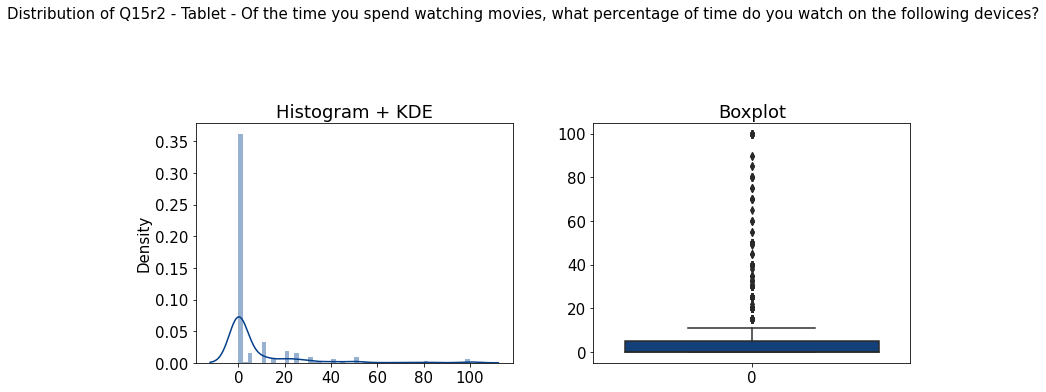

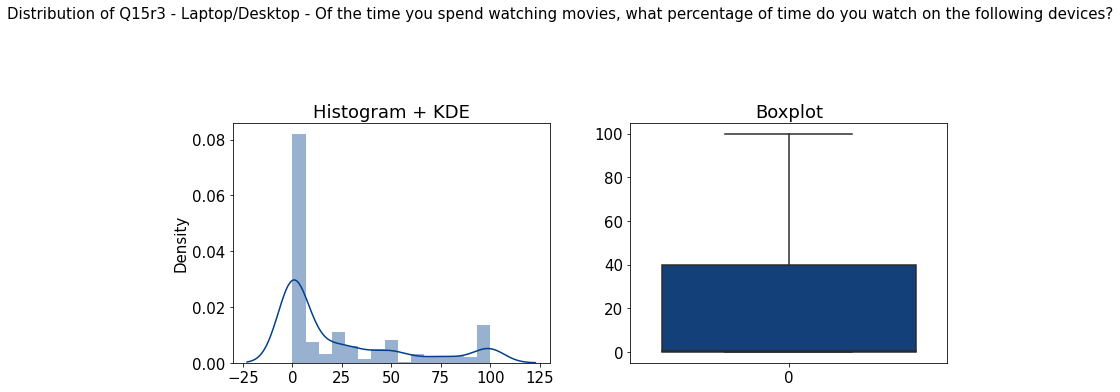

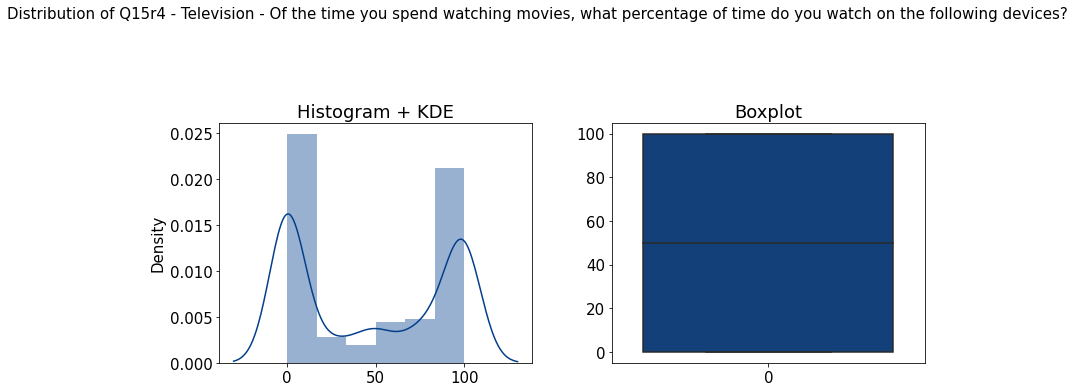

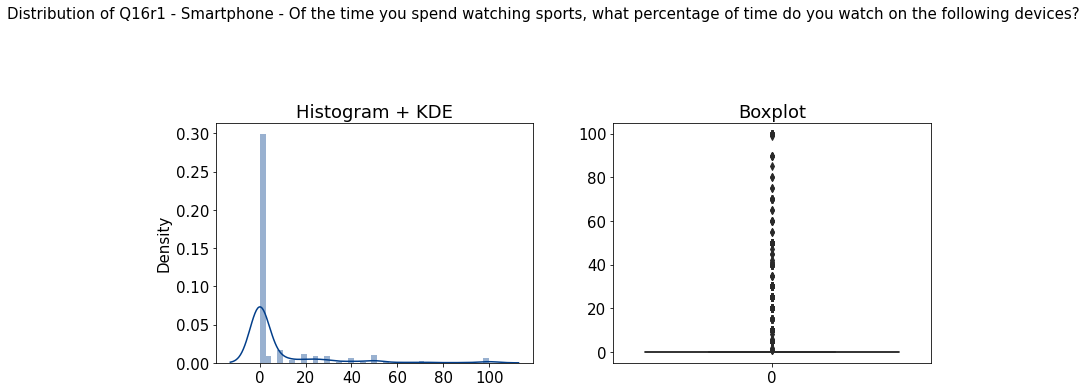

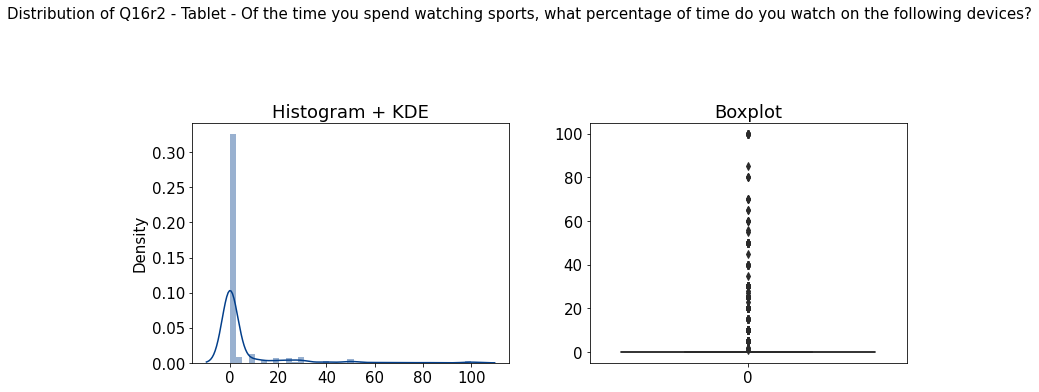

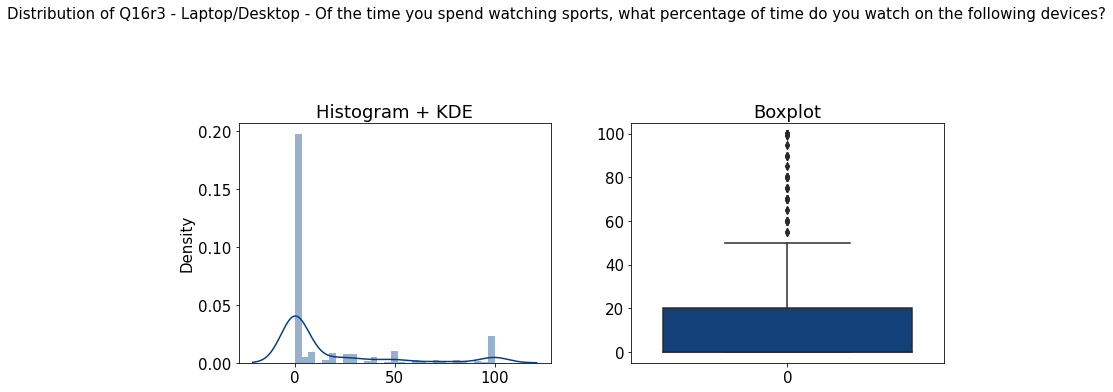

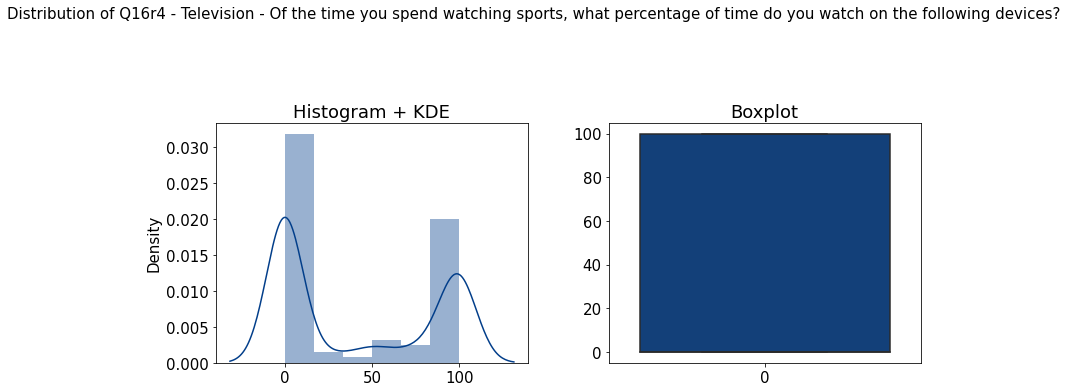

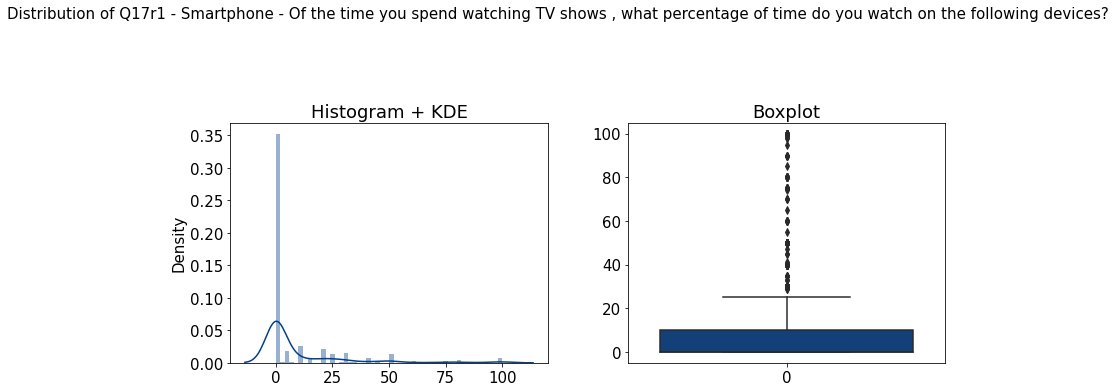

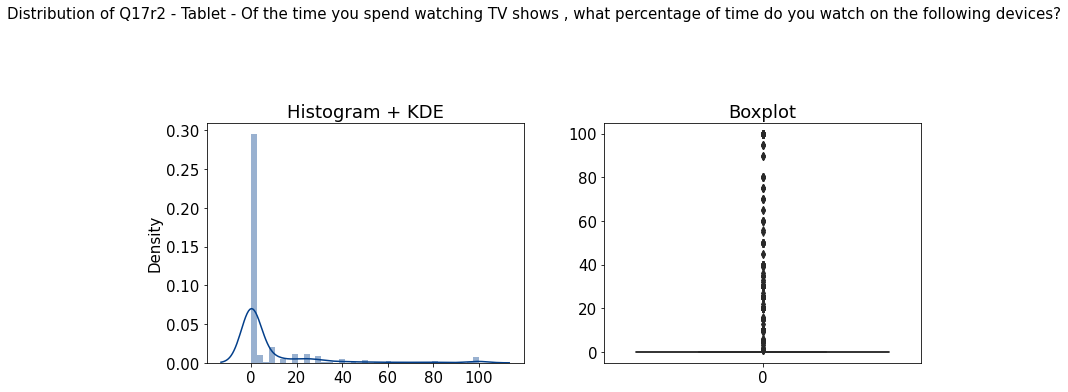

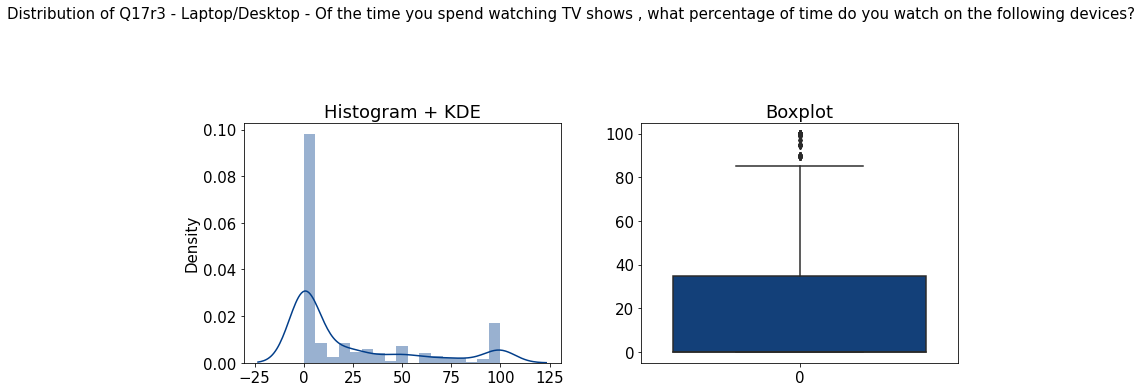

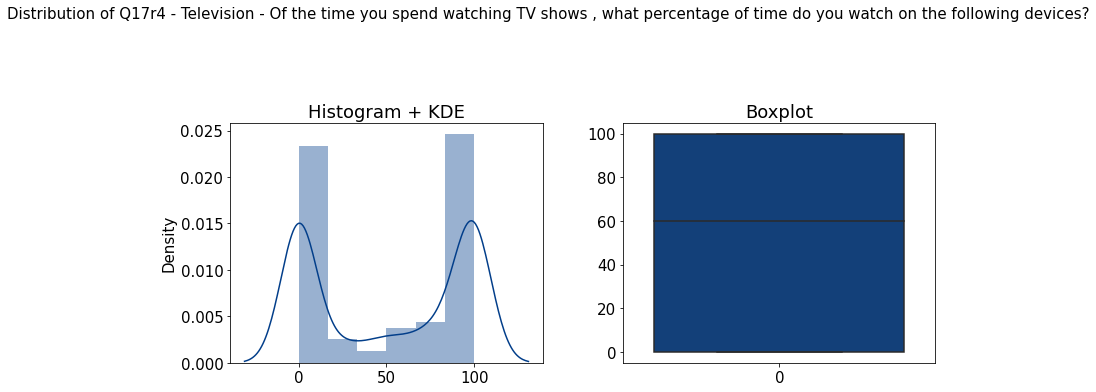

In [42]:
df_column_drop_num = df_column_drop_num.reset_index(drop=True)
for name in list(df_column_drop_num.columns):
    plot_distribution(df_column_drop_num[name],custom_colors[0], title="Distribution of " + name)

In [43]:
df_column_drop_num.columns

Index(['Q1r1 - To begin, what is your age?',
       'Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
       'Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
       'Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
       'Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?',
       'Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
       'Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
       'Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?',
       'Q16r4 - Televisi

### Then let's do the univariate analysis for categorical columns.

Boxplot and histogram for age - you are...


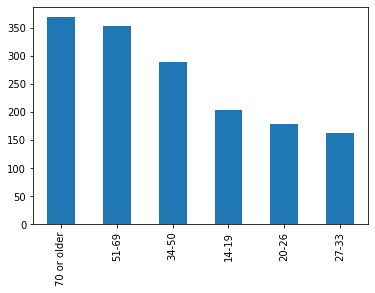

Boxplot and histogram for Q2 - In which state do you currently reside?


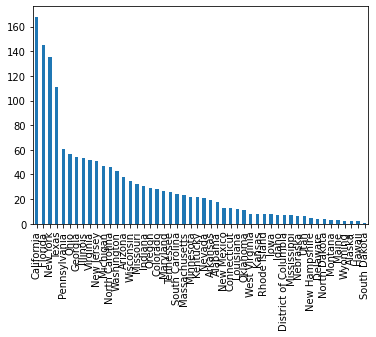

Boxplot and histogram for region - Region


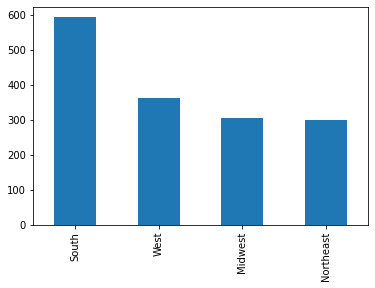

Boxplot and histogram for QNEW3 - What is your employment status?


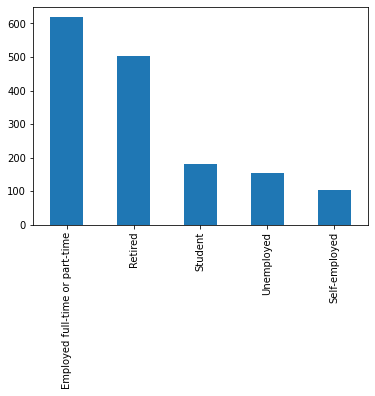

Boxplot and histogram for Q5 - Which category best describes your ethnicity?


Boxplot and histogram for QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?


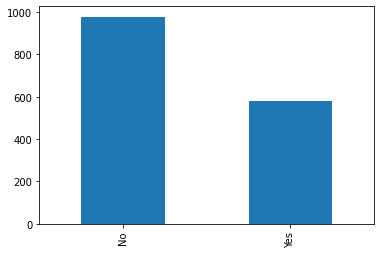

Boxplot and histogram for Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.


Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television


Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR)


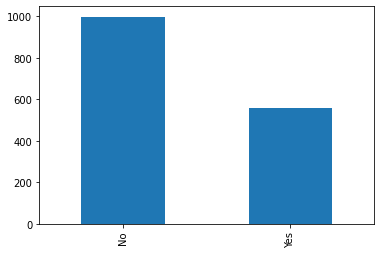

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box


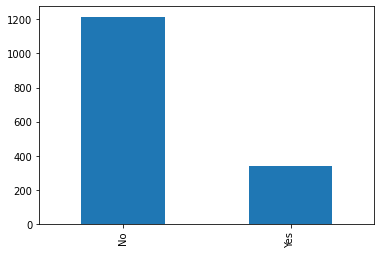

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob


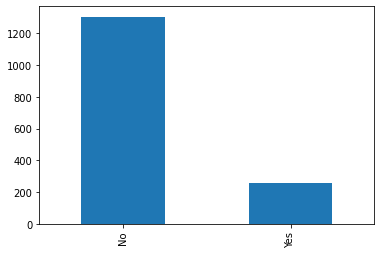

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)


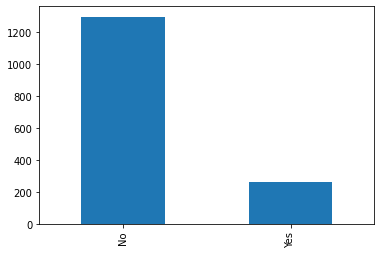

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player


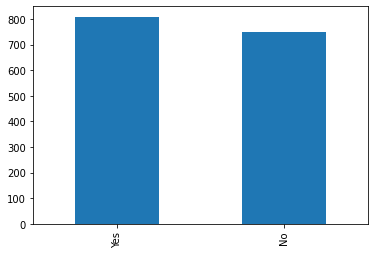

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console


Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player


Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage


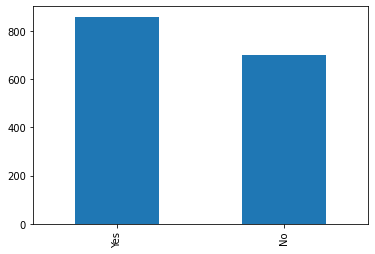

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer


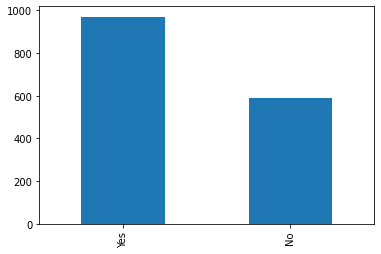

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer


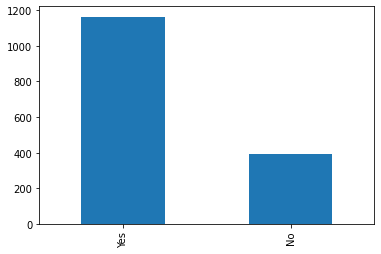

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet


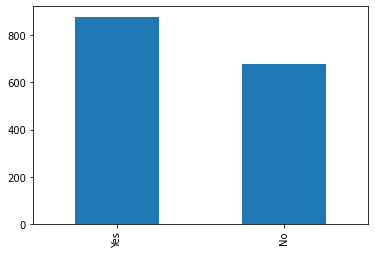

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader


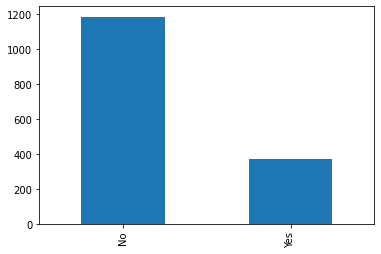

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone


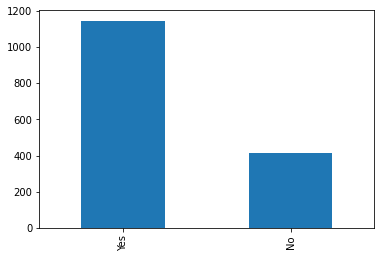

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone)


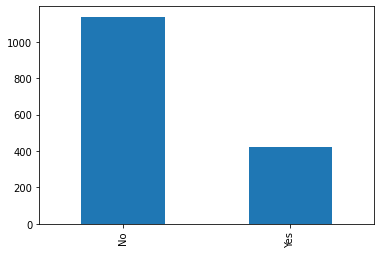

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch


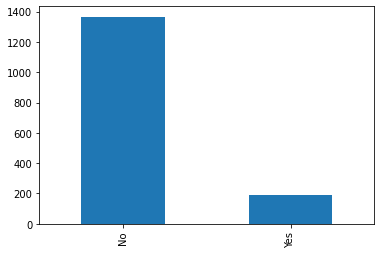

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band


Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset


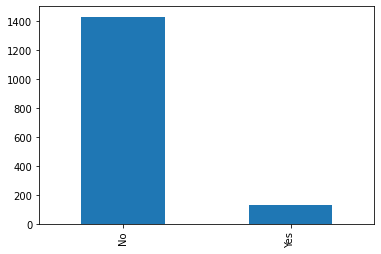

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Drone


Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above


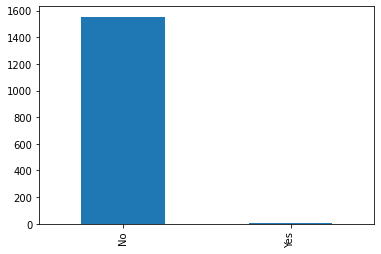

Boxplot and histogram for Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know


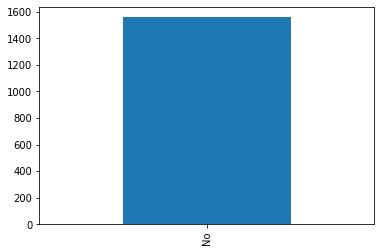

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television


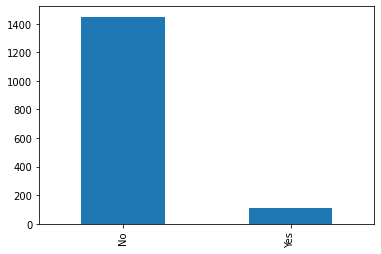

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)


Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box


Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob


Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)


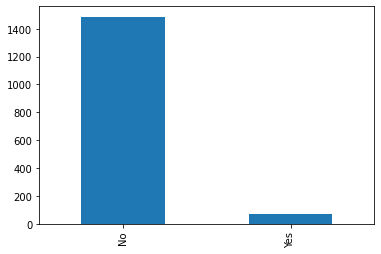

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player


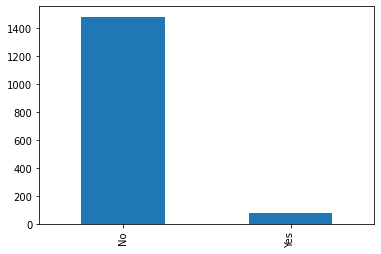

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console


Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player


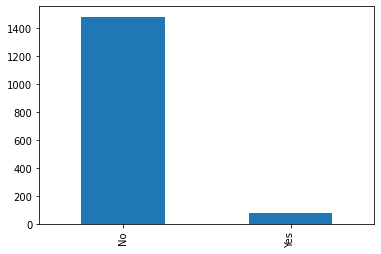

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Computer network/router in your home for wireless computer/laptop usage


Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Desktop computer


Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Laptop computer


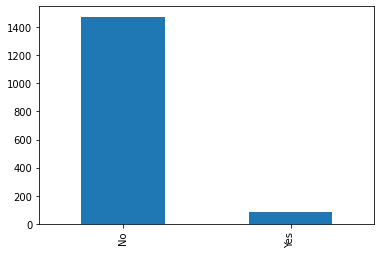

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Tablet


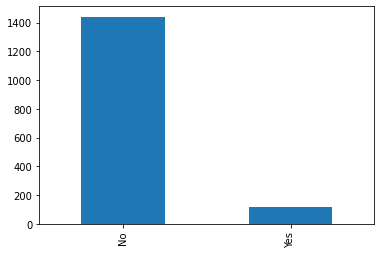

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Dedicated e-book reader


Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smartphone


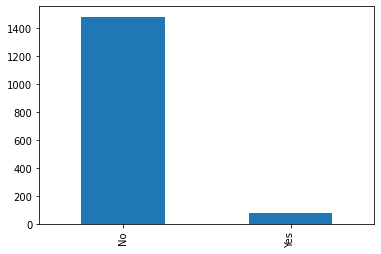

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Basic mobile phone (not a smartphone)


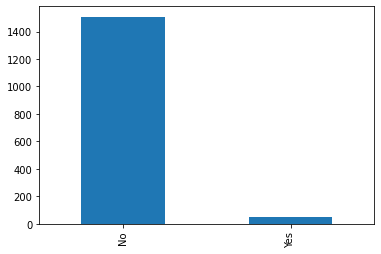

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Smart watch


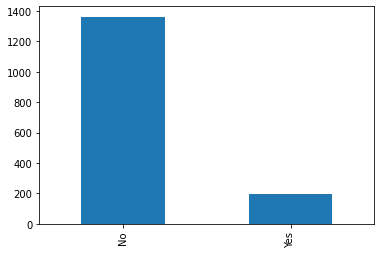

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Fitness band


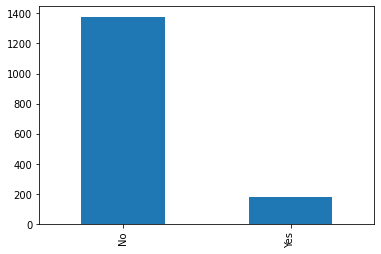

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Virtual reality headset


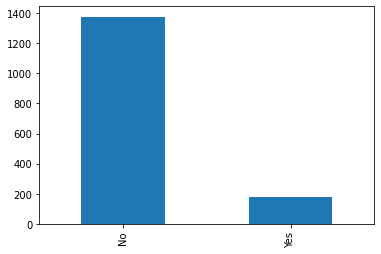

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Drone


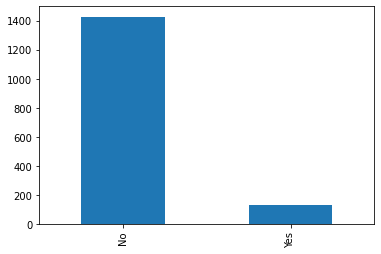

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-None of the above


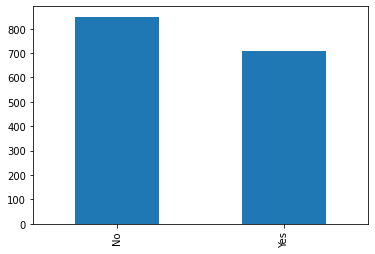

Boxplot and histogram for Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know


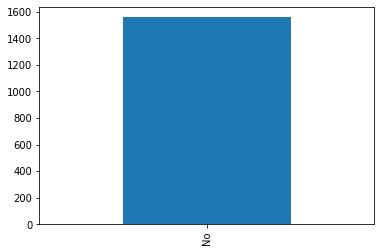

Boxplot and histogram for Q11r10 - Laptop computer - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to rank.  The fir


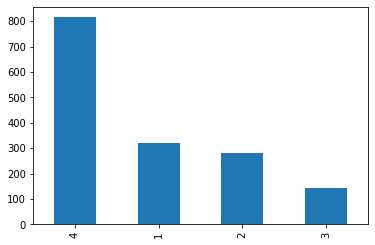

Boxplot and histogram for Q11r15 - Smartphone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in th


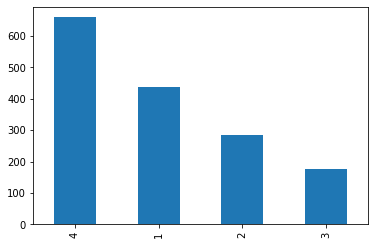

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Photo/video


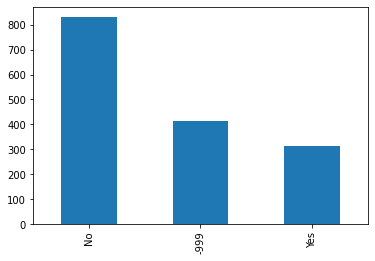

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Banking


Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Fitness/health


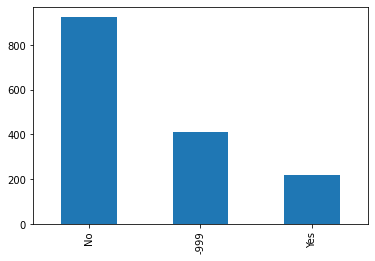

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Food/drink


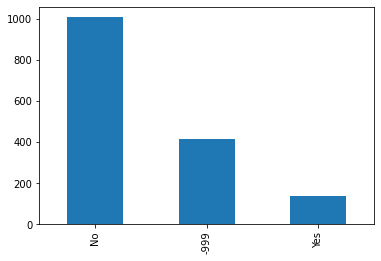

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Retail/shopping


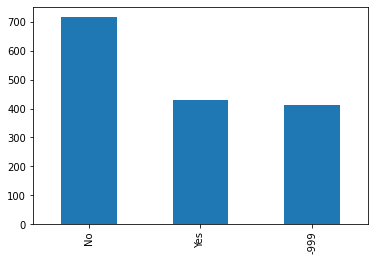

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Navigation


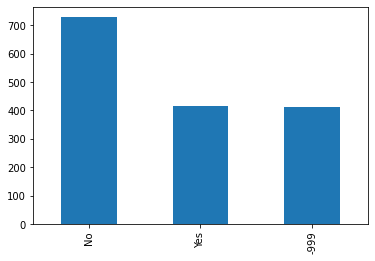

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Social networks


Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reading books


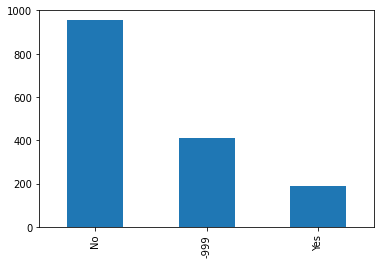

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Streaming music


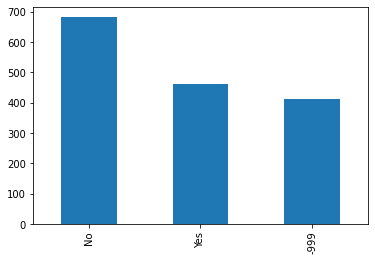

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Streaming video


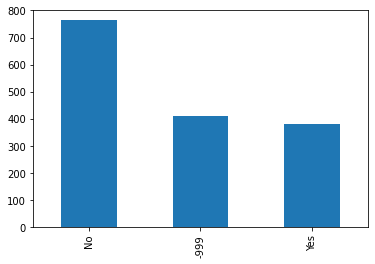

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reviews/guides


Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-News consolidator


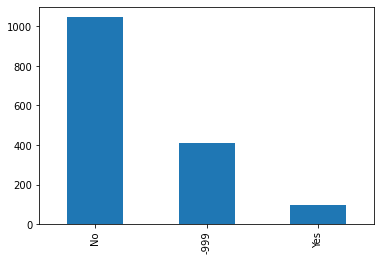

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Newspaper/news broadcaster


Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Magazines


Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Diagnostic/utilities


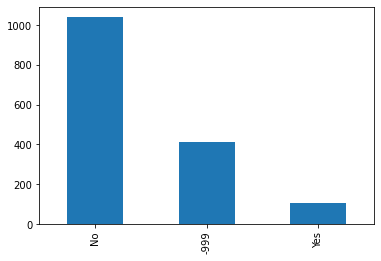

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-QR Reader


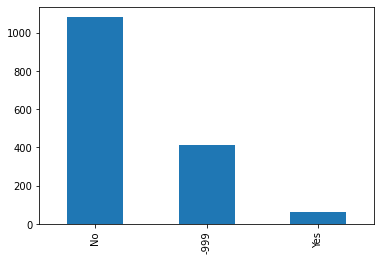

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Travel


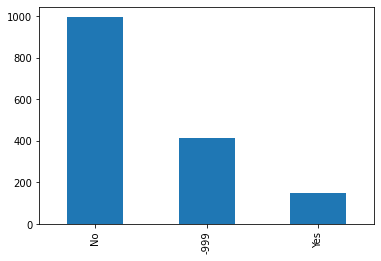

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Transportation


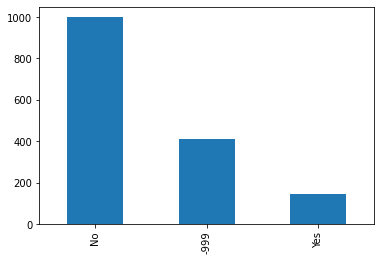

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Location


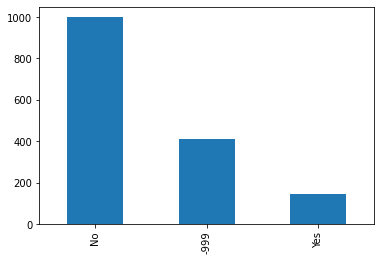

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Language


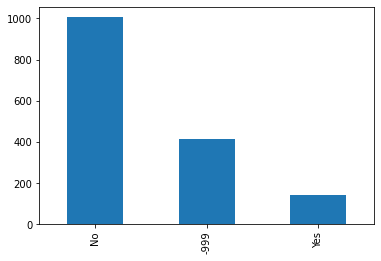

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Movie


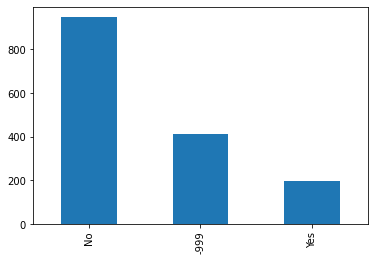

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Business


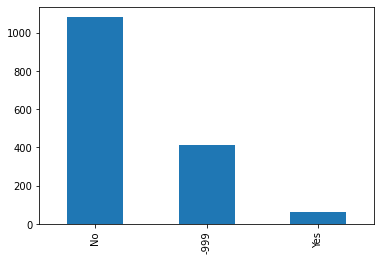

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Games


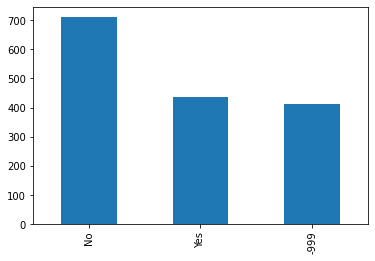

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Productivity


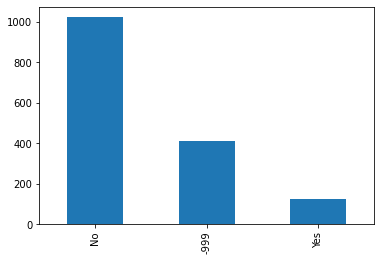

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Sports


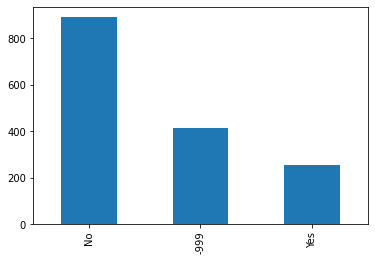

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Weather


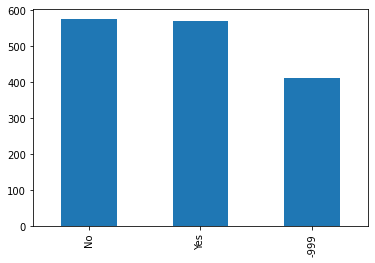

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Browser


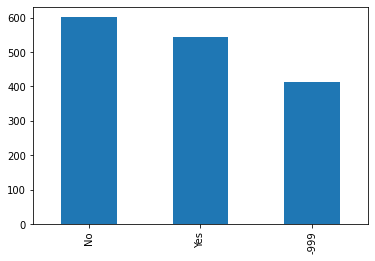

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-VOIP


Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Dating


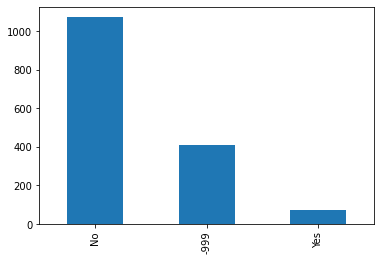

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Messaging


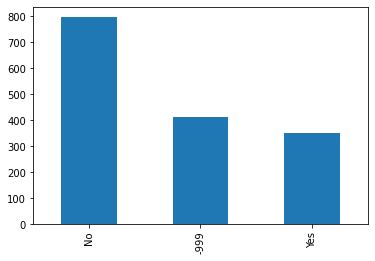

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Mobile payment


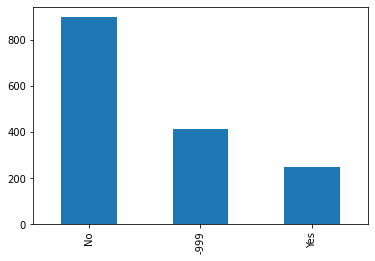

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Education


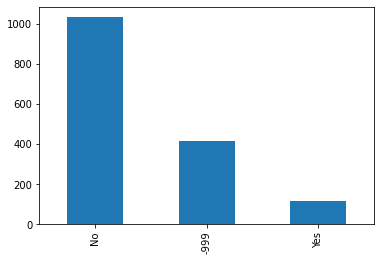

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Tickets


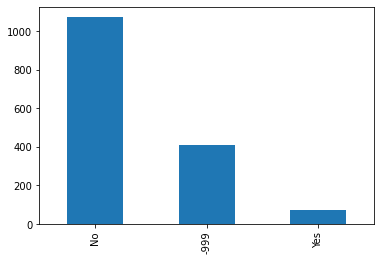

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reservations


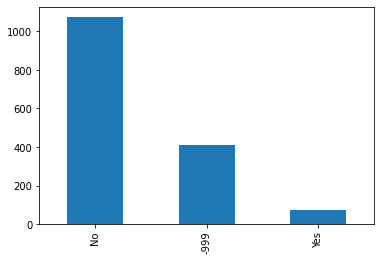

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Special interest/Hobby apps


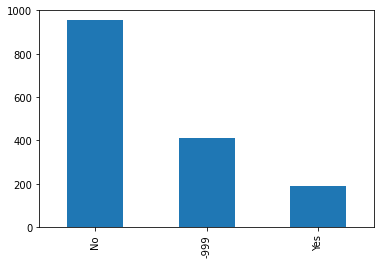

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-I do not use any of the above types of apps on a frequent (everyday/weekly) basis.


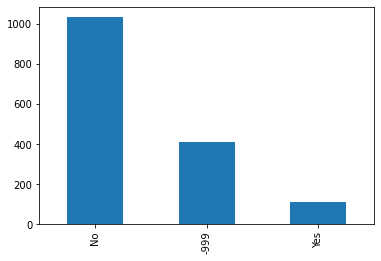

Boxplot and histogram for Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Don't Know


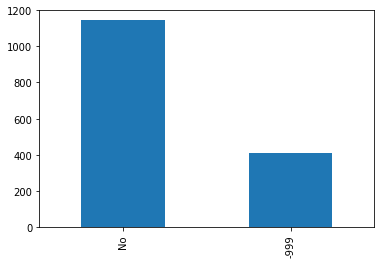

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Pay TV (traditional cable and/or satellite bundle)


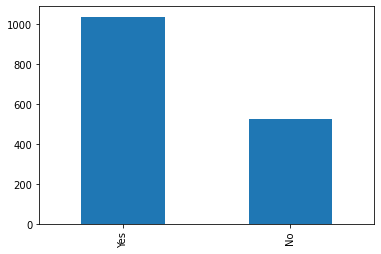

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Home internet


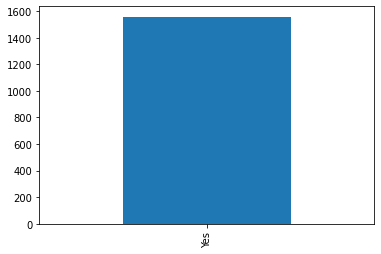

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Landline telephone


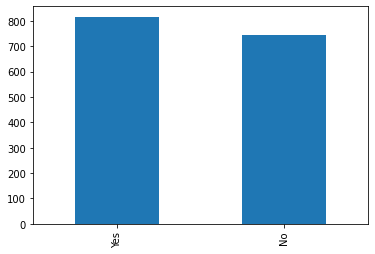

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Mobile voice (smartphone or basic mobile phone calling plan)


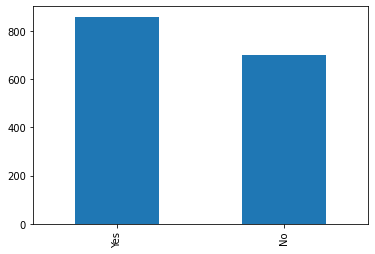

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Mobile data plan


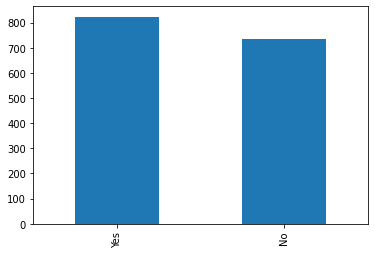

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Streaming video service


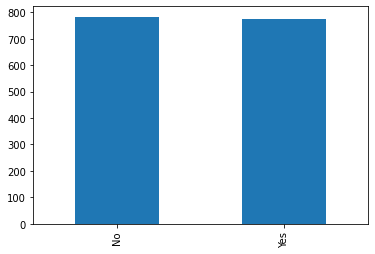

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Streaming music service


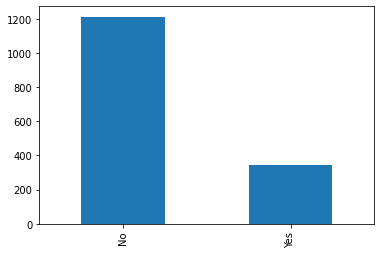

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Gaming


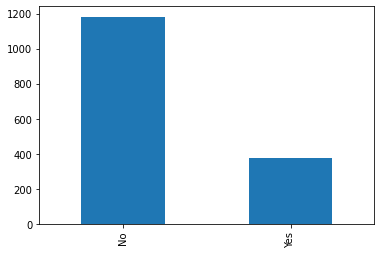

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-News/Newspaper (print or digital)


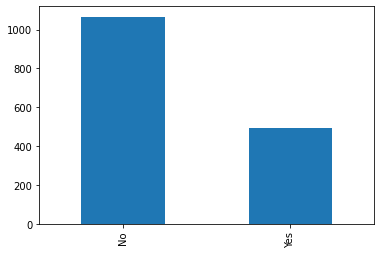

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Magazine (print or digital)


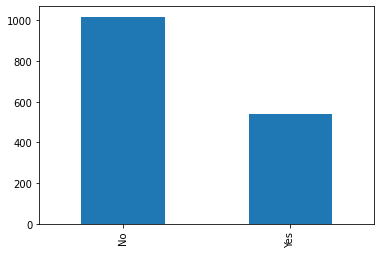

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-None of the above


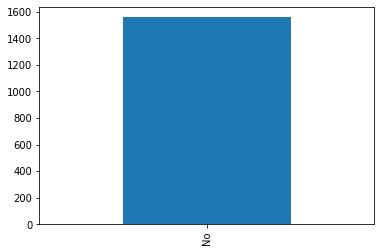

Boxplot and histogram for Q26 - Which of the following subscriptions does your household purchase?-Don't Know


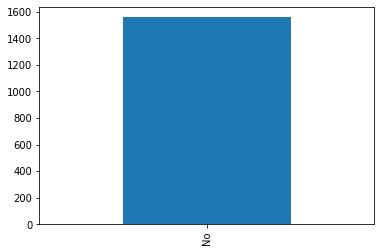

Boxplot and histogram for Q36r1 - Pay TV (traditional cable and/or satellite bundle) - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking


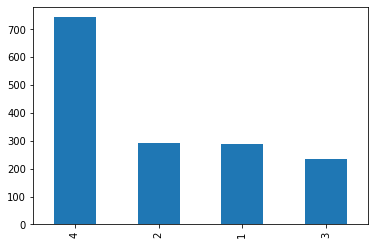

Boxplot and histogram for Q36r2 - Home internet - Of the services you indicated your household purchases, which [totalcount] do you value the most?Please rank the top [totalcount], with "1" being the most valued. Make your selections by clicking each item in the order you wish to r


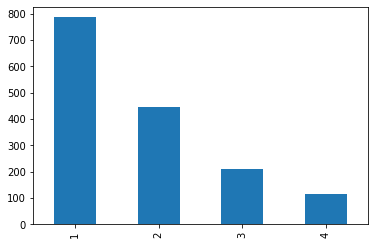

Boxplot and histogram for Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?


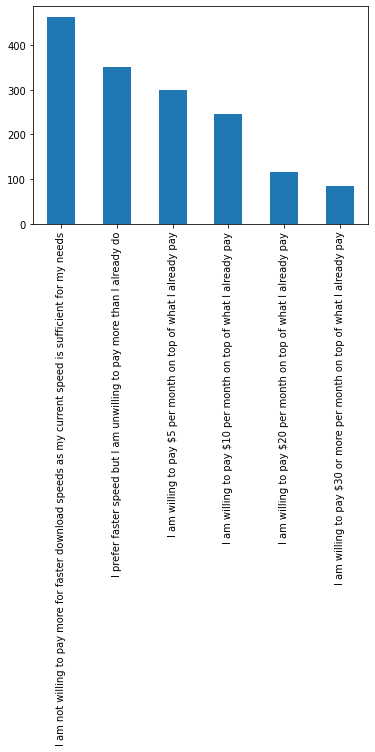

Boxplot and histogram for Q37r3 - Watching television (video content on any device) - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your selec


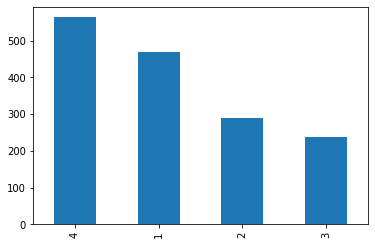

Boxplot and histogram for Q37r10 - Using the Internet for social or personal interests - For the following types of entertainment activities, please rank your top three, with "1" being the most preferred.Please rank the top three, with â€œ1â€ being the most preferred. Make your se


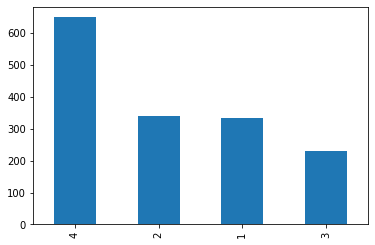

Boxplot and histogram for QNEW19r1 - Rent a physical DVD/Blu-ray - Thinking about how you watch movies, how frequently do you do each of the following?


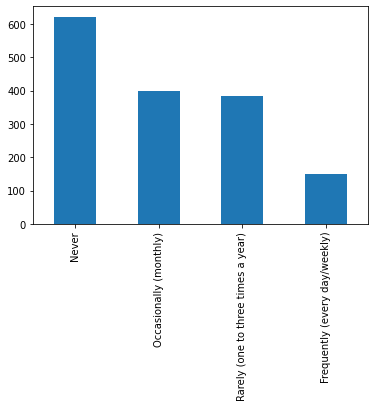

Boxplot and histogram for QNEW19r2 - Purchase a physical DVD/Blu-ray - Thinking about how you watch movies, how frequently do you do each of the following?


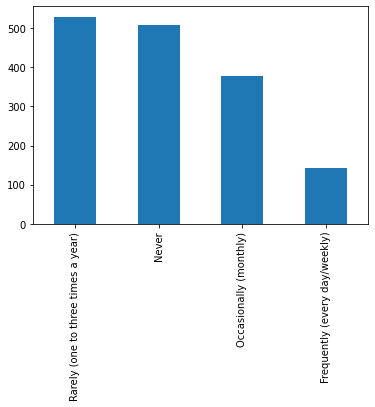

Boxplot and histogram for QNEW19r3 - Purchase digital video entertainment to download onto your device via online service - Thinking about how you watch movies, how frequently do you do each of the following?


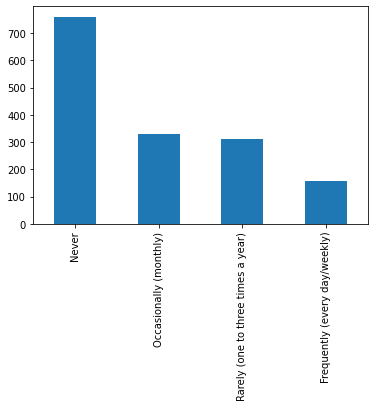

Boxplot and histogram for QNEW19r4 - Rent digital video entertainment where a digital file is downloaded to your device - Thinking about how you watch movies, how frequently do you do each of the following?


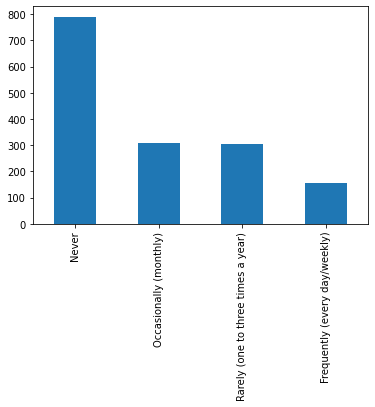

Boxplot and histogram for QNEW19r5 - Watch digital video entertainment via an online streaming service - Thinking about how you watch movies, how frequently do you do each of the following?


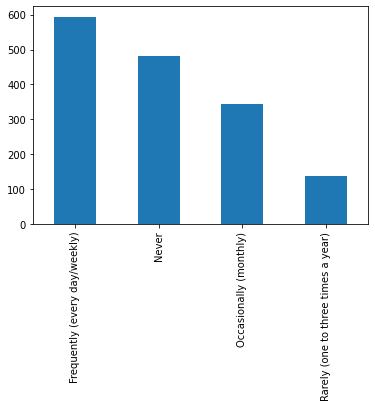

Boxplot and histogram for QNEW19r6 - Purchase/rent a video via your television service provider's On-Demand or Pay-Per-View service (i.e., via a set-top-box) - Thinking about how you watch movies, how frequently do you do each of the following?


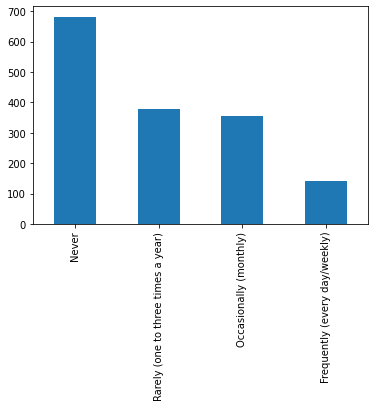

Boxplot and histogram for QNEW20r1 - Rent a physical DVD/Blu-ray - Thinking about how you watch television programming, how frequently do you do each of the following?


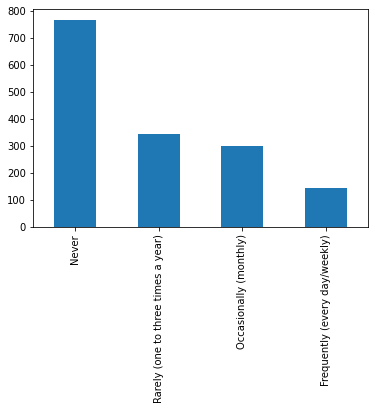

Boxplot and histogram for QNEW20r2 - Purchase a physical DVD/Blu-ray - Thinking about how you watch television programming, how frequently do you do each of the following?


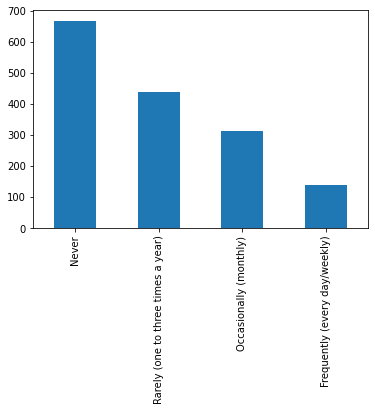

Boxplot and histogram for QNEW20r3 - Purchase digital video entertainment to download onto your device via online service - Thinking about how you watch television programming, how frequently do you do each of the following?


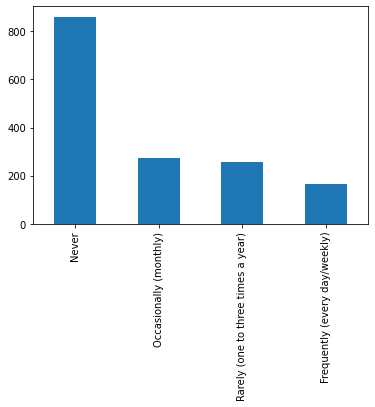

Boxplot and histogram for QNEW20r4 - Watch digital video entertainment via an online streaming service - Thinking about how you watch television programming, how frequently do you do each of the following?


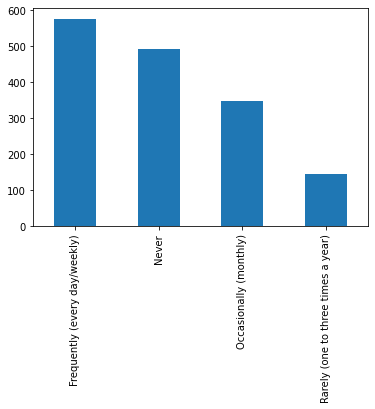

Boxplot and histogram for QNEW20r5 - Purchase/rent a video via your television service provider's On-Demand or Pay-Per-View service (i.e., via a set-top-box) - Thinking about how you watch television programming, how frequently do you do each of the following?


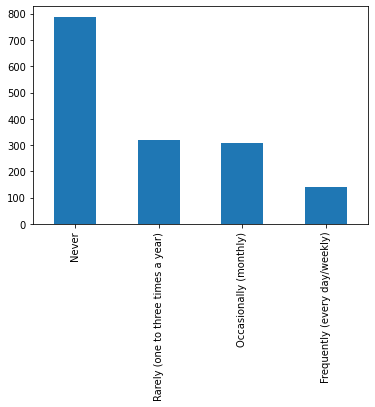

Boxplot and histogram for QNEW24 - Do you ever "binge-watch" television shows, meaning watching three or more episodes of a TV series in one sitting?


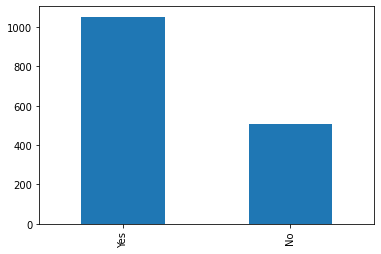

Boxplot and histogram for QNEW28 - How frequently do you use a friend or family member's (someone not living in your household) subscription login information  to watch digital content?


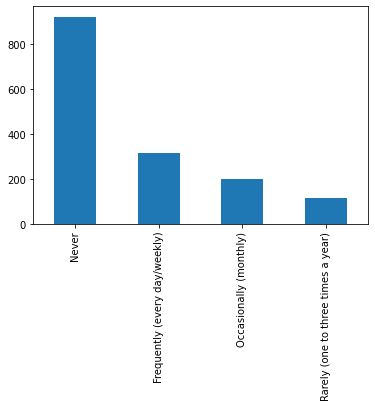

Boxplot and histogram for Q73r2 - Read for work and/or school - Which are things you typically do while watching your home television system?


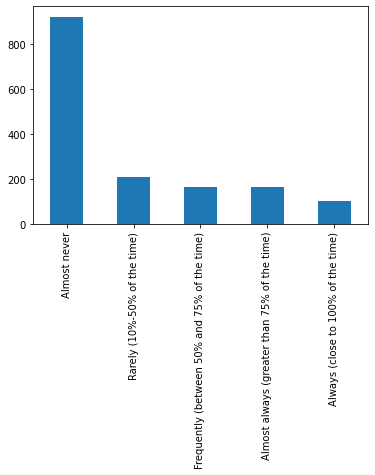

Boxplot and histogram for Q73r3 - Read for pleasure - Which are things you typically do while watching your home television system?


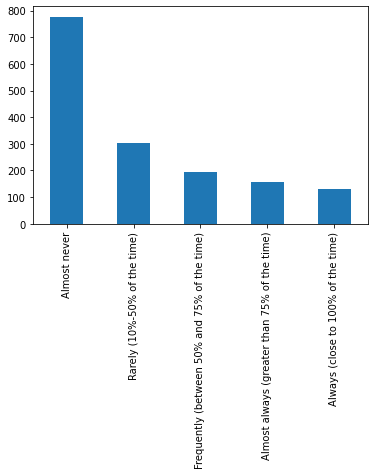

Boxplot and histogram for Q73r4 - Browse and surf the Web - Which are things you typically do while watching your home television system?


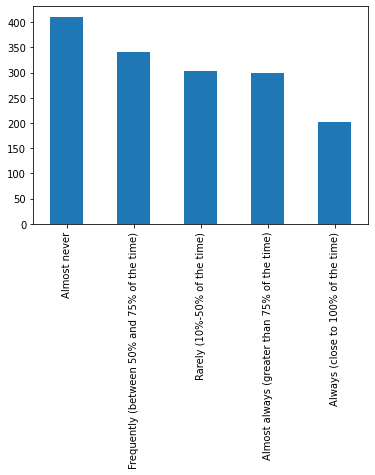

Boxplot and histogram for Q73r5 - Microblogging - Which are things you typically do while watching your home television system?


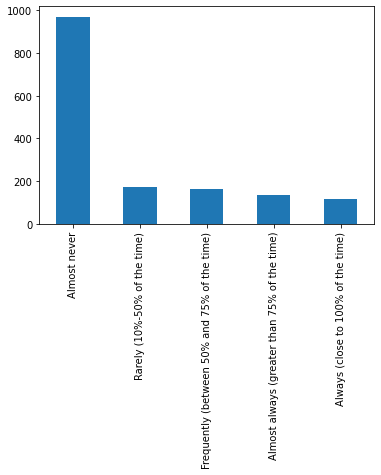

Boxplot and histogram for Q73r6 - Read email - Which are things you typically do while watching your home television system?


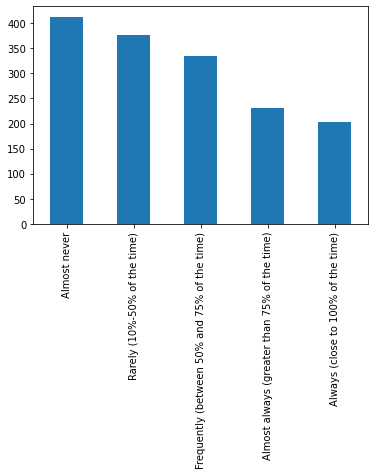

Boxplot and histogram for Q73r7 - Write email - Which are things you typically do while watching your home television system?


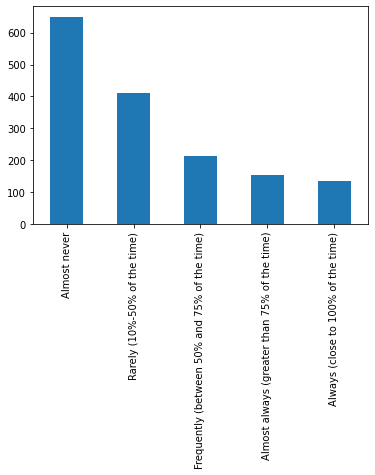

Boxplot and histogram for Q73r8 - Text message - Which are things you typically do while watching your home television system?


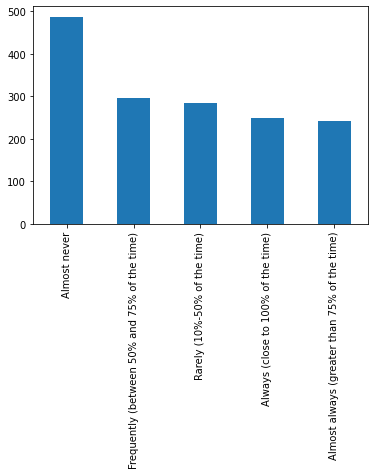

Boxplot and histogram for Q73r9 - Use a social network - Which are things you typically do while watching your home television system?


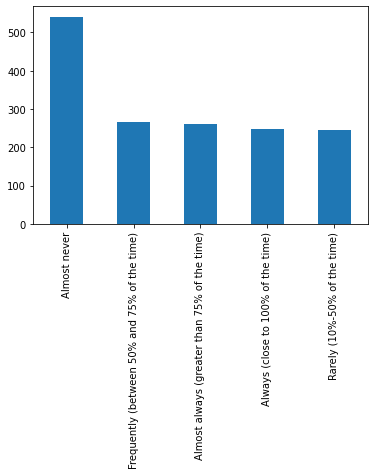

Boxplot and histogram for Q73r10 - Talk on the phone - Which are things you typically do while watching your home television system?


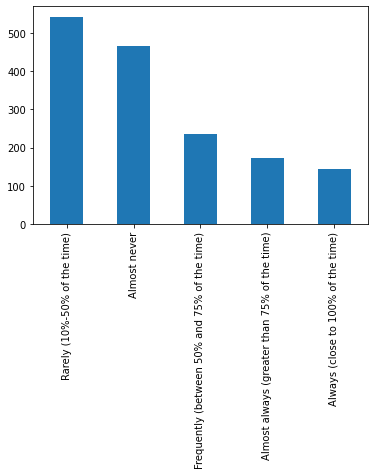

Boxplot and histogram for Q73r11 - Browse for products and services online - Which are things you typically do while watching your home television system?


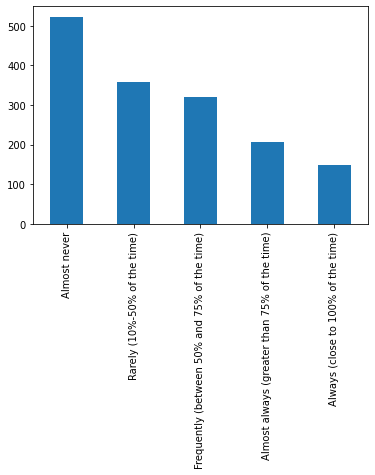

Boxplot and histogram for Q73r12 - Purchase products and services online - Which are things you typically do while watching your home television system?


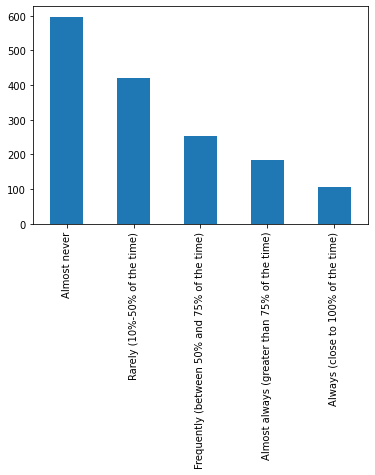

Boxplot and histogram for Q73r13 - Play video games - Which are things you typically do while watching your home television system?


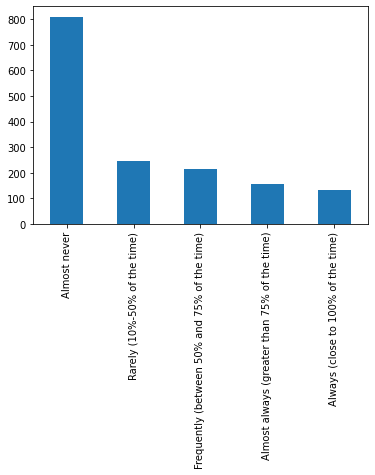

Boxplot and histogram for Q39r1 - I would rather pay for news online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."


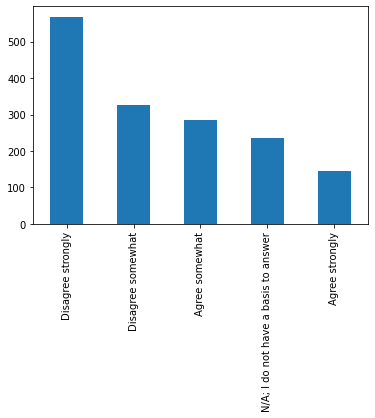

Boxplot and histogram for Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c


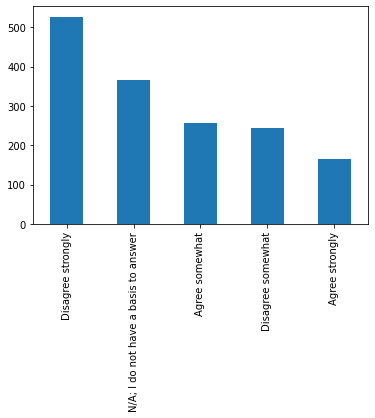

Boxplot and histogram for Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."


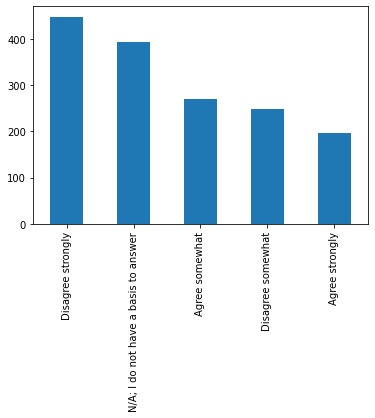

Boxplot and histogram for Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."


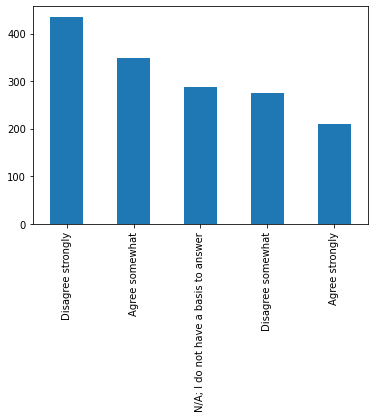

Boxplot and histogram for Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A


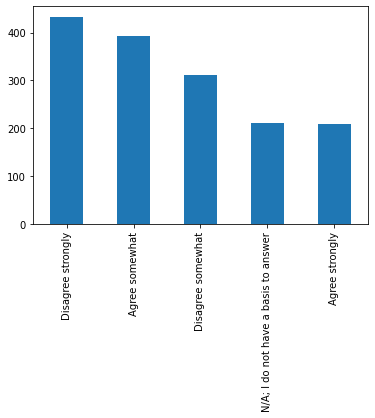

Boxplot and histogram for Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose "N/A."


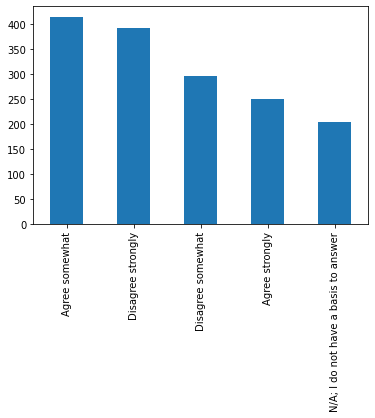

Boxplot and histogram for Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.


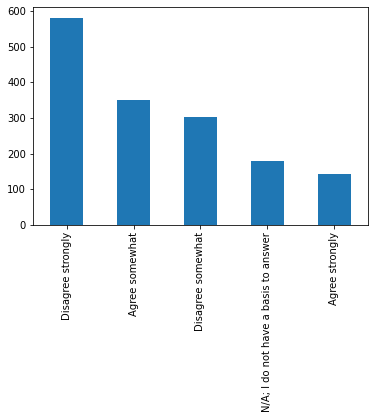

Boxplot and histogram for Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho


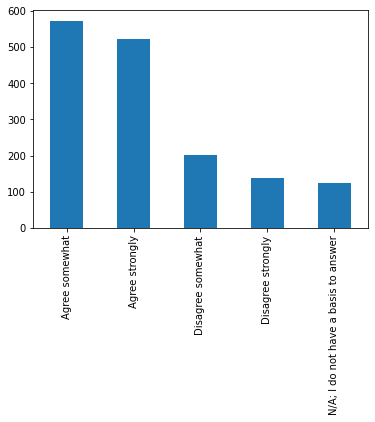

Boxplot and histogram for Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit


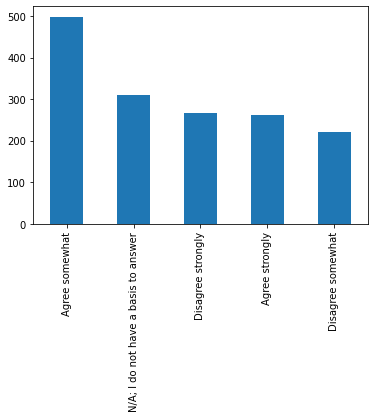

Boxplot and histogram for Q89 - Which of the following is your most frequently used mechanism to get news?


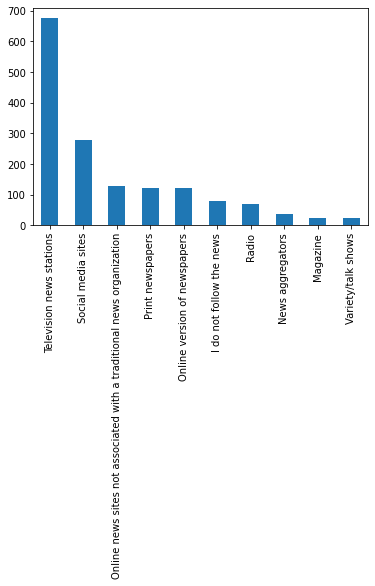

Boxplot and histogram for FINAL WEIGHTS


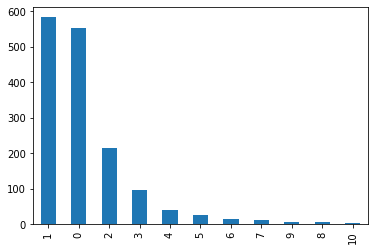

In [44]:
%matplotlib inline
for name in list(df_column_drop_cat.columns[1:]):
    print('Boxplot and histogram for '+str(name))
    df_column_drop_cat[str(name)].value_counts().plot(kind='bar')
    plt.show()

## 1.6 Bivariate analysis

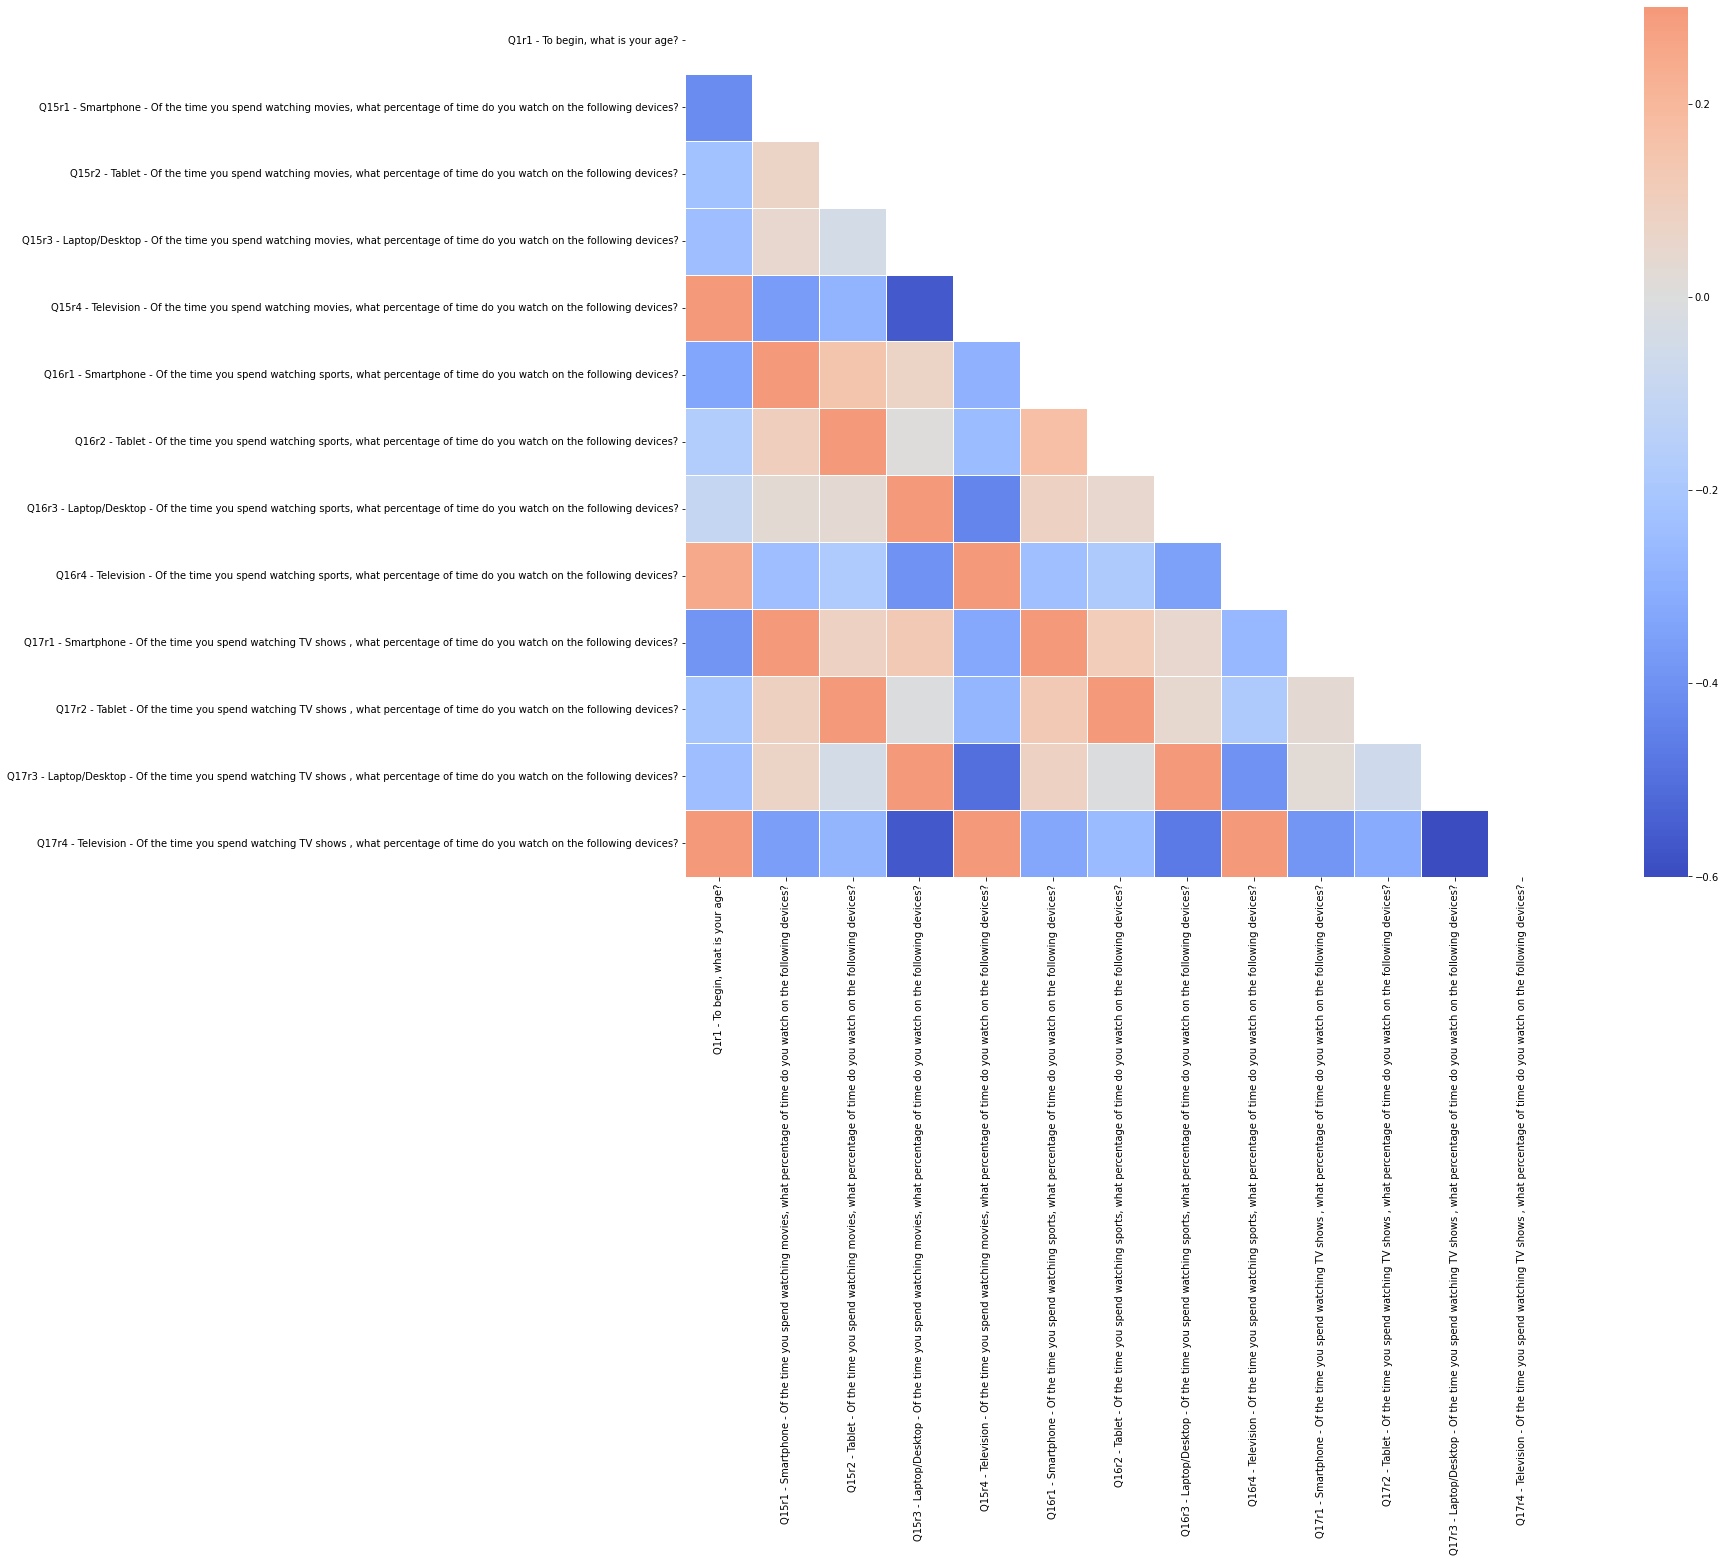

In [45]:
# generating a correlation heatmap
plt.figure(figsize=(32,16))

#calculate the correlation matrix for numerical columns
corr = df_column_drop_num.astype(float).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

### For the dataset part with categorical data, it does not make much sense to look at the correlations with bivariate analysis. Since the plausible way to do so is to count the value pairs and look at the pair's frequencies, which do not provide much helpful information in this sense.

## 1.8 Feature Selection

In [46]:
df_final.shape

(1558, 155)

In [47]:
cols_to_include = r'(Q1)|(Q4)|(Q2)|(QNEW3)|(Q6)|(Q8(r3|r4|r6|r8|r9|r10|r12|r15).)|(Q10(r3|r4|r6|r8|r9|r10|r12|r15).)|(Q11(r3|r4|r6|r8|r9|r10|r12|r15).)|(Q22(?!.[r36] I do not use any of the above types of apps on a frequent everyday/weekly basis.).)|(Q37r10.)|(Q73(r4|r5|r6|r7|r9|r11|r12|r13).)|(Q26.(r2|r5|r6|r7|r8))|(Q36.*(r2|r5|r6|r7|r8))|(Q29)'

regex_pattern = re.compile(cols_to_include)
cols_to_select = [col for col in df_final.columns if regex_pattern.match(col)]
df_final = df_final[cols_to_select]

In [48]:
df_final.shape

(1558, 100)

# Further cleaning of data: One Hot Encoding

### Binary encoding

In [49]:
# Replace Yes by 1 and No by 0
df_final.replace({'Yes':1,'No':0},inplace=True)

In [50]:
df_final

Q1r1 - To begin, what is your age? Q4 - What is your gender?  \
1                                  26.0                    Female   
3                                  25.0                    Female   
4                                  28.0                      Male   
9                                  16.0                    Female   
10                                 32.0                    Female   
...                                 ...                       ...   
2126                               14.0                      Male   
2127                               70.0                      Male   
2128                               18.0                      Male   
2129                               79.0                    Female   
2130                               77.0                    Female   

     Q2 - In which state do you currently reside?  \
1                                        New York   
3                                      California   
4                                         Indiana   
9                                     Connecticut   
10                                       New York   
...                                           ...   
2126                                       Oregon   
2127                                Massachusetts   
2128                                      Alabama   
2129                                     Illinois   
2130                                 Pennsylvania   

     QNEW3 - What is your employment status?  \
1            Employed full-time or part-time   
3            Employed full-time or part-time   
4                                    Student   
9                                    Student   
10           Employed full-time or part-time   
...                                      ...   
2126                              Unemployed   
2127                                 Retired   
2128                              Unemployed   
2129                                 Retired   
2130                                 Retired   

     Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.  \
1                                    $50,000 to $99,999                                                                                                                                      
3                                     Less than $29,999                                                                                                                                      
4                                    $50,000 to $99,999                                                                                                                                      
9                                  $100,000 to $299,999                                                                                                                                      
10                                   $50,000 to $99,999                                                                                                                                      
...                                                 ...                                                                                                                                      
2126                               $100,000 to $299,999                                                                                                                                      
2127                                 $50,000 to $99,999                                                                                                                                      
2128                                 $50,000 to $99,999                                                                                                                                      
2129                                  Less than $29,999       

In [51]:
# Treat our outcome column: for ones indicate willing to pay more amount, we treat them as yes - 1 and the rest as no - 0
df_final['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].unique()

array(['I am willing to pay $20 per month on top of what I already pay',
       'I am willing to pay $5 per month on top of what I already pay',
       'I am willing to pay $10 per month on top of what I already pay',
       'I prefer faster speed but I am unwilling to pay more than I already do',
       'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs',
       'I am willing to pay $30 or more per month on top of what I already pay'],
      dtype=object)

In [52]:
# Replace Yes by 1 and No by 0
df_final['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].replace({'I am willing to pay $20 per month on top of what I already pay':1,'I am willing to pay $5 per month on top of what I already pay':1,'I am willing to pay $10 per month on top of what I already pay':1,'I am willing to pay $30 or more per month on top of what I already pay':1,'I prefer faster speed but I am unwilling to pay more than I already do':0,'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs':0},inplace=True)

In [53]:
df_final.head()

Q1r1 - To begin, what is your age? Q4 - What is your gender?  \
1                                26.0                    Female   
3                                25.0                    Female   
4                                28.0                      Male   
9                                16.0                    Female   
10                               32.0                    Female   

   Q2 - In which state do you currently reside?  \
1                                      New York   
3                                    California   
4                                       Indiana   
9                                   Connecticut   
10                                     New York   

   QNEW3 - What is your employment status?  \
1          Employed full-time or part-time   
3          Employed full-time or part-time   
4                                  Student   
9                                  Student   
10         Employed full-time or part-time   

   Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.  \
1                                  $50,000 to $99,999                                                                                                                                      
3                                   Less than $29,999                                                                                                                                      
4                                  $50,000 to $99,999                                                                                                                                      
9                                $100,000 to $299,999                                                                                                                                      
10                                 $50,000 to $99,999                                                                                                                                      

    Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television  \
1                                                   0                                                                                                             
3                                                   0                                                                                                             
4                                                   0                                                                                                             
9                                                   0                                                                                                             
10                                                  0                                                                                                             

    Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)  \
1                                                   0                                                                                                                    
3                                                   0                                                                                                                    
4                                                   0                                                                                                                    
9                                                   0                                                                                                                    
10                                                  0     

In [54]:
# Create a new DataFrame with one-hot encoded columns
one_hot_cols = list(pd.concat([df_final.iloc[:,1:5],df_final.iloc[:,92:101]],axis=1).columns)
one_hot_df = pd.get_dummies(df_final[one_hot_cols])

# Combine the original DataFrame with the one-hot encoded DataFrame
new_df = pd.concat([df_final, one_hot_df], axis=1)

In [55]:
# Drop the original columns that were one-hot encoded
new_df.drop(columns=one_hot_cols, inplace=True)

In [56]:
new_df.to_csv("data/Preprocessed data.csv", index=None)